In [155]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim 

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [156]:
class MNISTGenerator(nn.Module):
    def __init__(self, latent_dimension):
        super().__init__()

        self.generator = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, noise):
        batch_size = noise.shape[0]
        generated = self.generator(noise)
        return generated.reshape(batch_size, 1, 28, 28)

class MNISTDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.discriminator = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(256, 1), # outputs logits
        )

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.reshape(batch_size, -1)
        return self.discriminator(x)
        

In [171]:
latent_dimension = 100
batch_size = 128
generator_learning_rate = 0.0002
discriminator_learning_rate = 0.0002
device = "cuda" if torch.cuda.is_available() else "cpu"
epochs = 200

In [172]:
### Define Models ###
generator = MNISTGenerator(latent_dimension).to(device)
discriminator = MNISTDiscriminator().to(device)

### Define Optimizers ###
gen_optimizer = optim.Adam(generator.parameters(), generator_learning_rate)
disc_optimizer = optim.Adam(discriminator.parameters(), discriminator_learning_rate)

### Define Datasets ###
tensor2image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


trainset = MNIST("../../data", transform=tensor2image_transforms)
trainloader = DataLoader(trainset, batch_size=batch_size)

### Define Loss Function ###
loss_func = nn.BCEWithLogitsLoss()

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 0/200 | Generator Loss: 3.9947955910839252 | Discriminator Loss: 0.2899941512269836


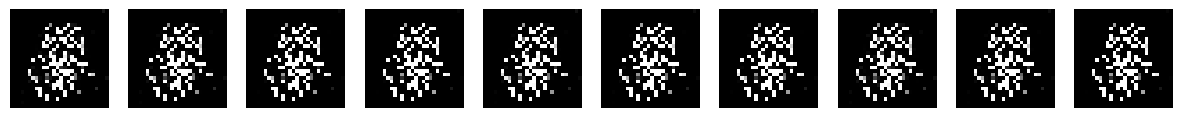

Epoch: 1/200 | Generator Loss: 6.303405382231609 | Discriminator Loss: 0.13911413180747076


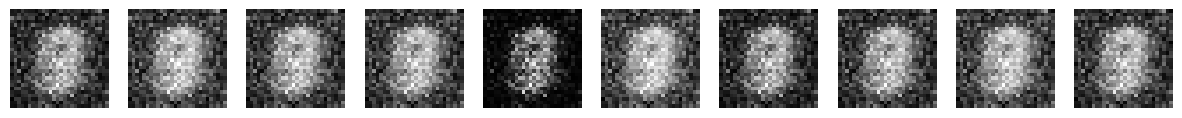

Epoch: 2/200 | Generator Loss: 4.036917608175704 | Discriminator Loss: 0.08857637108750403


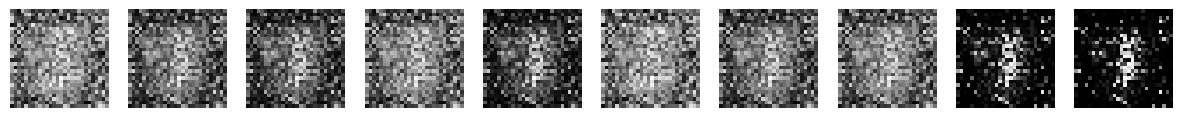

Epoch: 3/200 | Generator Loss: 5.239151861113526 | Discriminator Loss: 0.03730361654943447


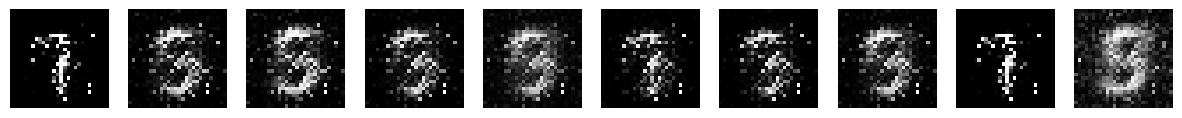

Epoch: 4/200 | Generator Loss: 5.194765248024133 | Discriminator Loss: 0.05066813467624488


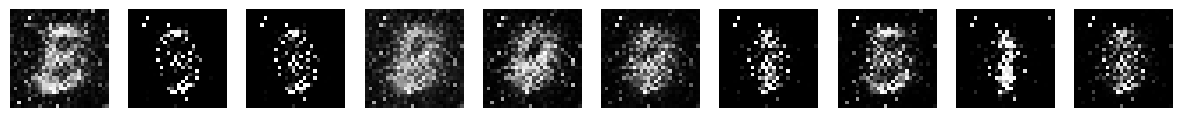

Epoch: 5/200 | Generator Loss: 6.116392829524937 | Discriminator Loss: 0.04052900831038351


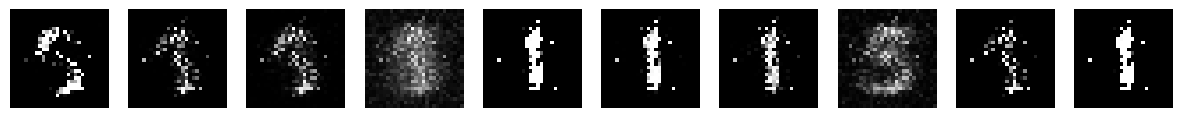

Epoch: 6/200 | Generator Loss: 5.6811893057467335 | Discriminator Loss: 0.04953623958615098


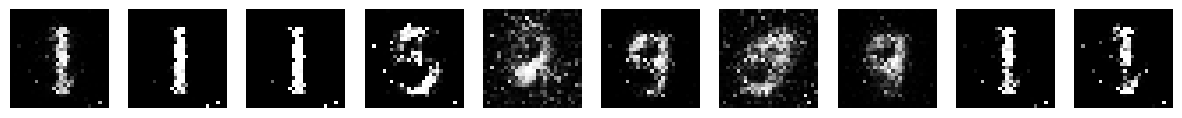

Epoch: 7/200 | Generator Loss: 5.297151995620239 | Discriminator Loss: 0.06733968634722329


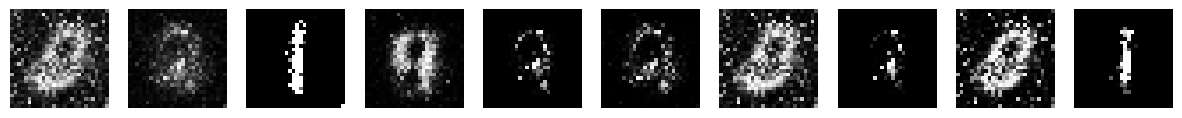

Epoch: 8/200 | Generator Loss: 5.047111928081716 | Discriminator Loss: 0.07534878857648258


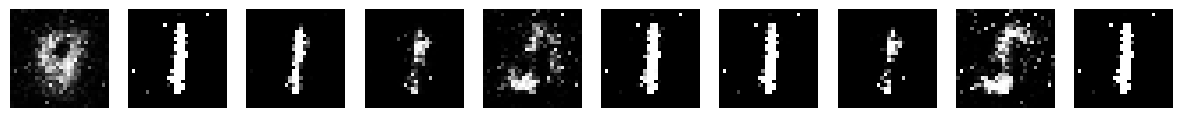

Epoch: 9/200 | Generator Loss: 5.025056263531194 | Discriminator Loss: 0.080955555777687


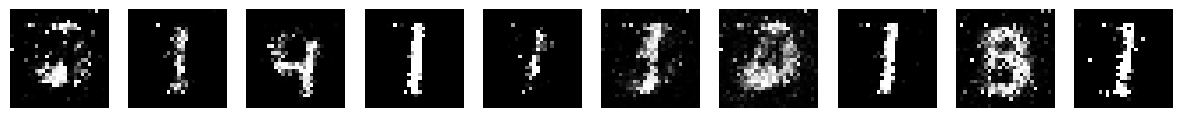

Epoch: 10/200 | Generator Loss: 4.723016492339339 | Discriminator Loss: 0.08694950798585979


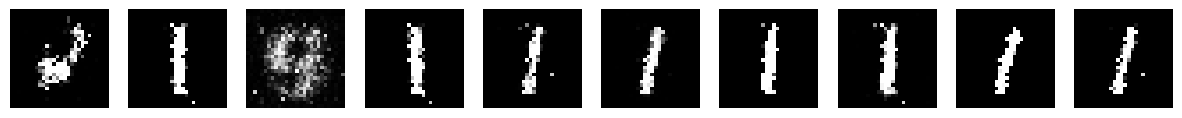

Epoch: 11/200 | Generator Loss: 4.070795318465243 | Discriminator Loss: 0.11479452161042929


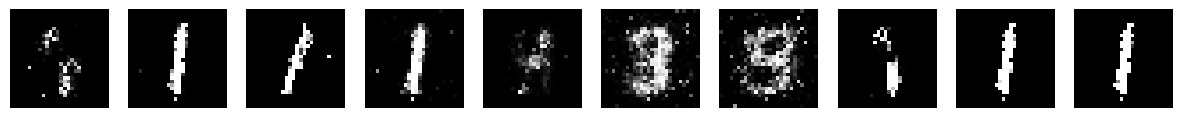

Epoch: 12/200 | Generator Loss: 3.722389449951237 | Discriminator Loss: 0.13077040158037437


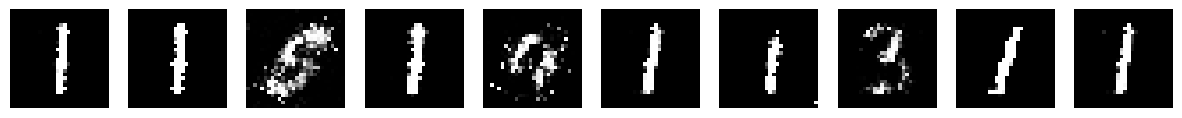

Epoch: 13/200 | Generator Loss: 3.450509897935619 | Discriminator Loss: 0.14845510962198794


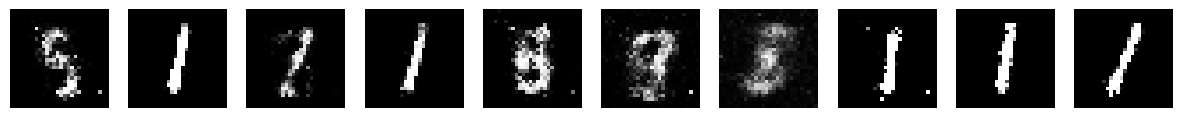

Epoch: 14/200 | Generator Loss: 3.133527051157026 | Discriminator Loss: 0.17781881304946281


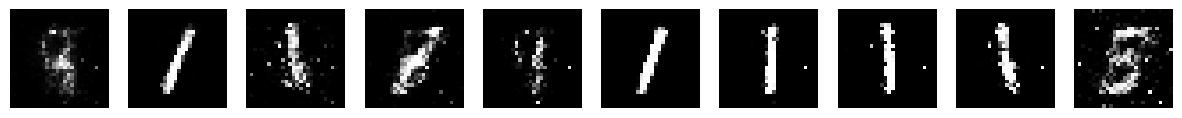

Epoch: 15/200 | Generator Loss: 2.910510824433268 | Discriminator Loss: 0.18779768235584313


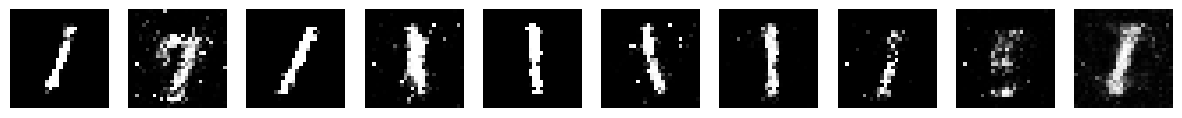

Epoch: 16/200 | Generator Loss: 2.657452987455356 | Discriminator Loss: 0.20637909956832431


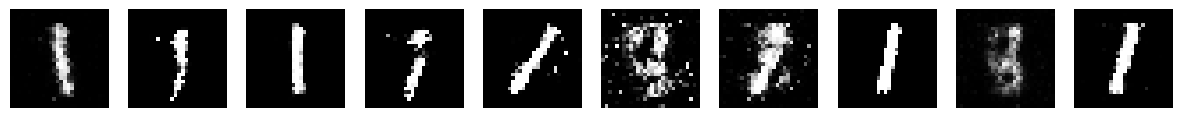

Epoch: 17/200 | Generator Loss: 2.613856419063072 | Discriminator Loss: 0.21441005774017083


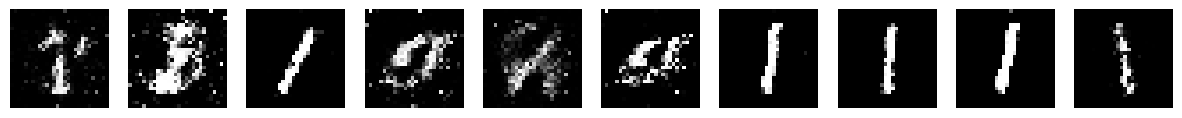

Epoch: 18/200 | Generator Loss: 2.5153084546009867 | Discriminator Loss: 0.23103955407132473


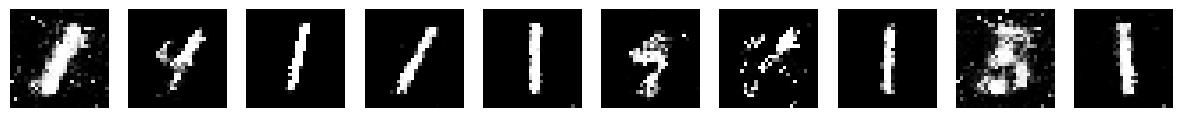

Epoch: 19/200 | Generator Loss: 2.3139039717757623 | Discriminator Loss: 0.26376882456004747


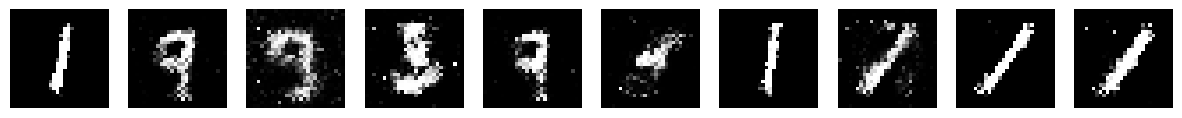

Epoch: 20/200 | Generator Loss: 2.234287377613694 | Discriminator Loss: 0.2747149589473505


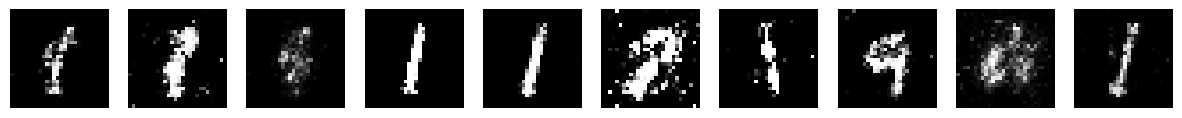

Epoch: 21/200 | Generator Loss: 2.16622372603874 | Discriminator Loss: 0.28503828633949957


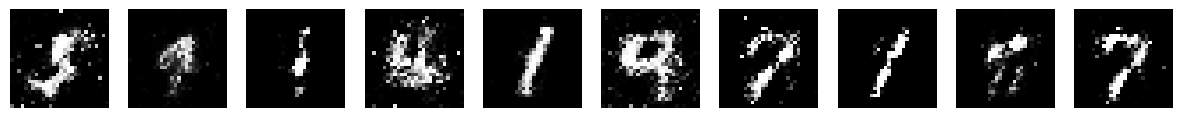

Epoch: 22/200 | Generator Loss: 2.0773061376644857 | Discriminator Loss: 0.30689613241503744


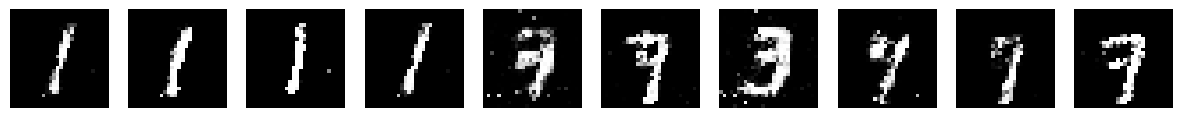

Epoch: 23/200 | Generator Loss: 2.0535766356535303 | Discriminator Loss: 0.31592288378205124


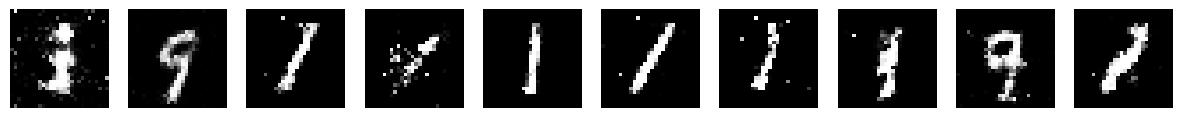

Epoch: 24/200 | Generator Loss: 1.9622545743039421 | Discriminator Loss: 0.3369605618117969


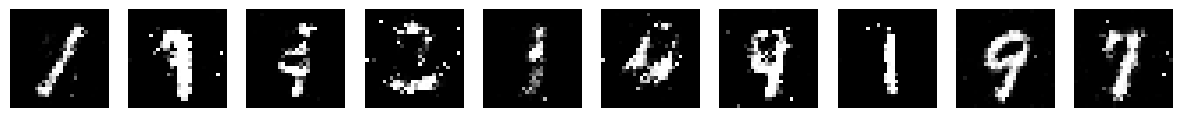

Epoch: 25/200 | Generator Loss: 1.9137804663257558 | Discriminator Loss: 0.34511544560191476


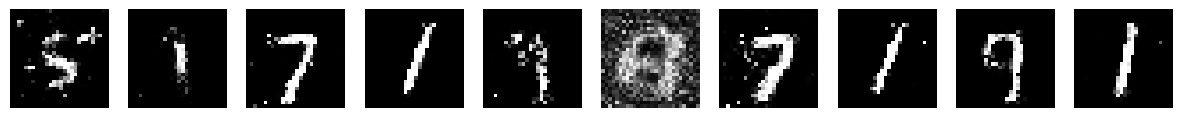

Epoch: 26/200 | Generator Loss: 1.8529196301502968 | Discriminator Loss: 0.36423881606125375


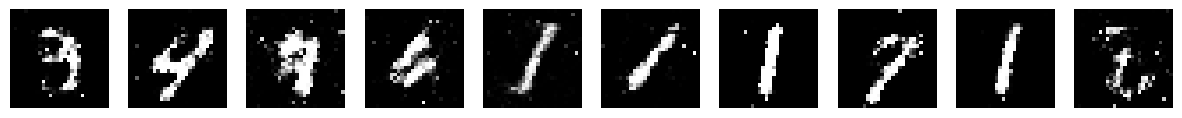

Epoch: 27/200 | Generator Loss: 1.7631165841495051 | Discriminator Loss: 0.37595597799144576


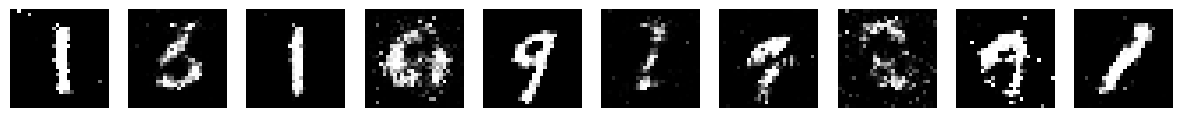

Epoch: 28/200 | Generator Loss: 1.7241232466341845 | Discriminator Loss: 0.3940177268183816


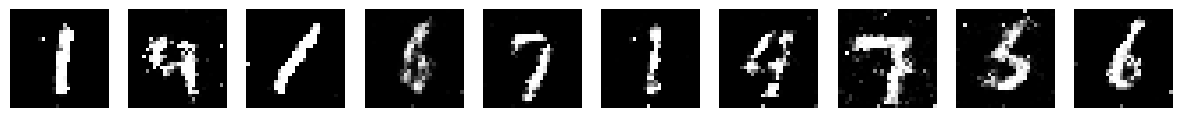

Epoch: 29/200 | Generator Loss: 1.716524389761089 | Discriminator Loss: 0.39279412848354656


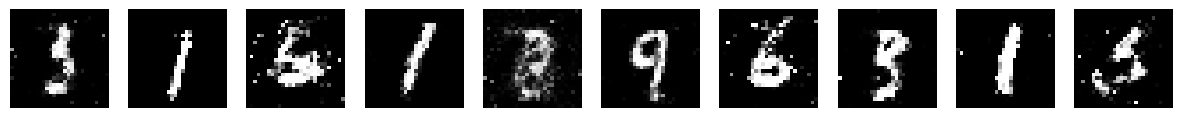

Epoch: 30/200 | Generator Loss: 1.6983696537485509 | Discriminator Loss: 0.3994487251427128


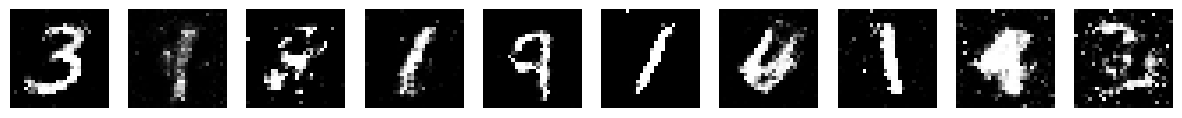

Epoch: 31/200 | Generator Loss: 1.6269556228031736 | Discriminator Loss: 0.4158913365432194


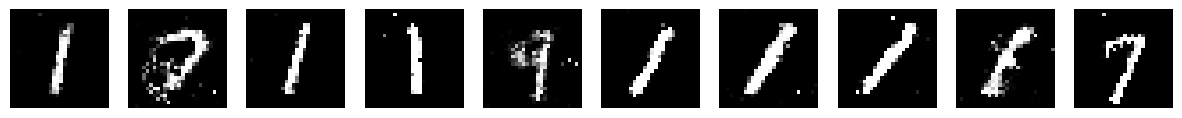

Epoch: 32/200 | Generator Loss: 1.6201404871971115 | Discriminator Loss: 0.41557171286296235


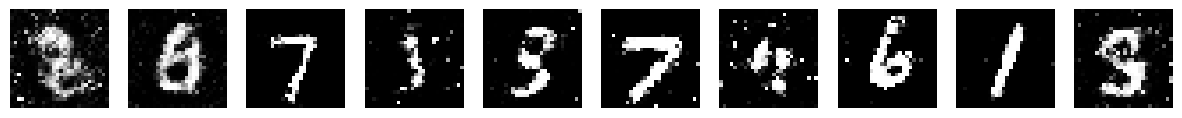

Epoch: 33/200 | Generator Loss: 1.591992326382635 | Discriminator Loss: 0.42674289589751757


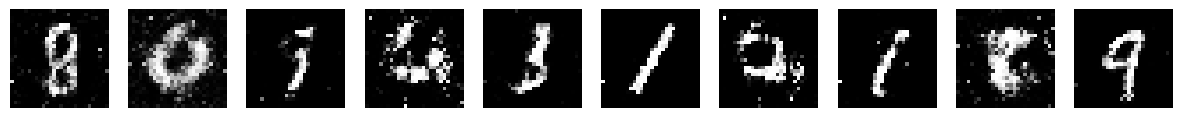

Epoch: 34/200 | Generator Loss: 1.558389293359541 | Discriminator Loss: 0.432675209762191


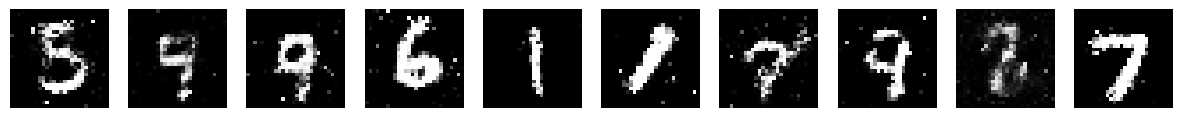

Epoch: 35/200 | Generator Loss: 1.520810048463248 | Discriminator Loss: 0.4419631878577316


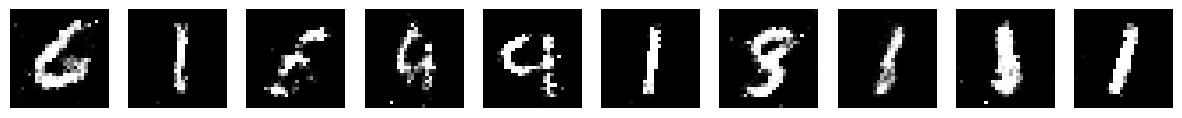

Epoch: 36/200 | Generator Loss: 1.512676508950272 | Discriminator Loss: 0.4449925463336871


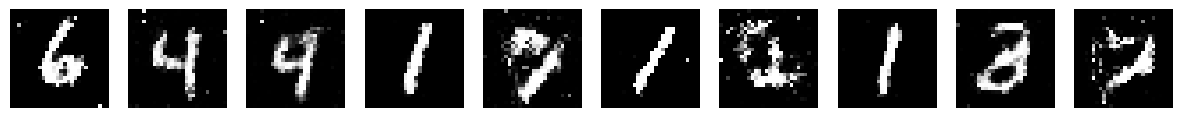

Epoch: 37/200 | Generator Loss: 1.489399511931039 | Discriminator Loss: 0.4549313654015059


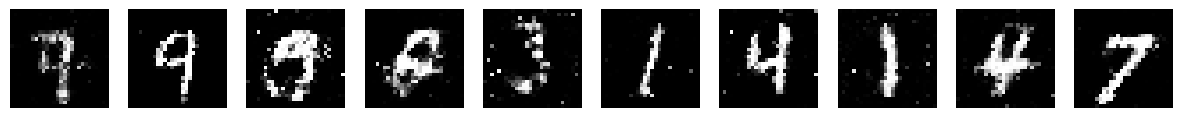

Epoch: 38/200 | Generator Loss: 1.445217797496934 | Discriminator Loss: 0.4650270441320659


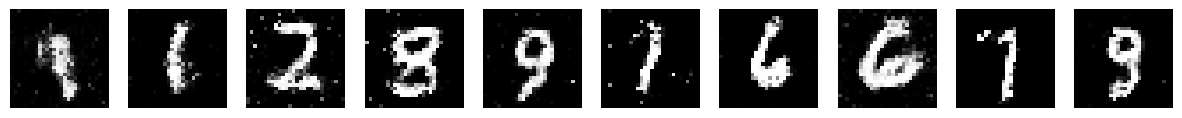

Epoch: 39/200 | Generator Loss: 1.4279425517836613 | Discriminator Loss: 0.47372139256391954


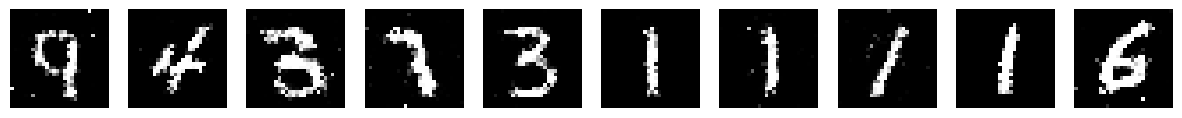

Epoch: 40/200 | Generator Loss: 1.4200498595166562 | Discriminator Loss: 0.47421487962513337


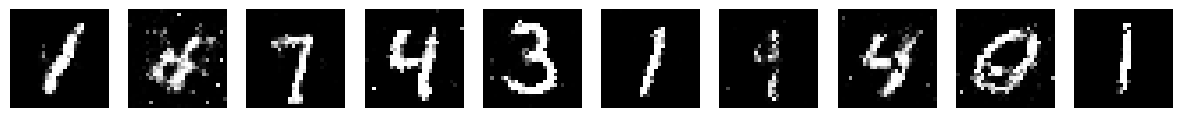

Epoch: 41/200 | Generator Loss: 1.4193375130960428 | Discriminator Loss: 0.4742246939302253


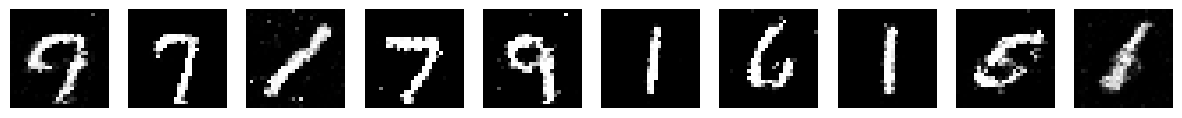

Epoch: 42/200 | Generator Loss: 1.4098259548642742 | Discriminator Loss: 0.4778429624368387


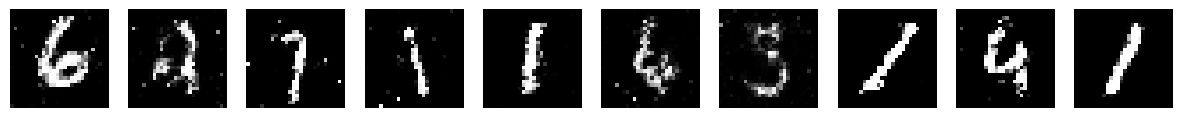

Epoch: 43/200 | Generator Loss: 1.4212893163725766 | Discriminator Loss: 0.4741598145921093


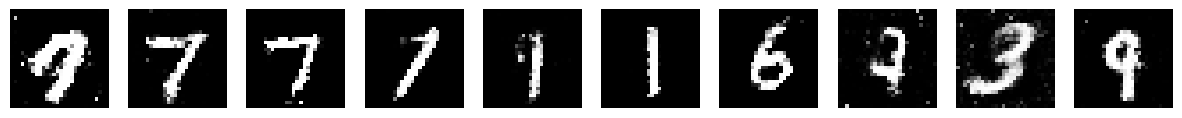

Epoch: 44/200 | Generator Loss: 1.3964989439510842 | Discriminator Loss: 0.4835287012906471


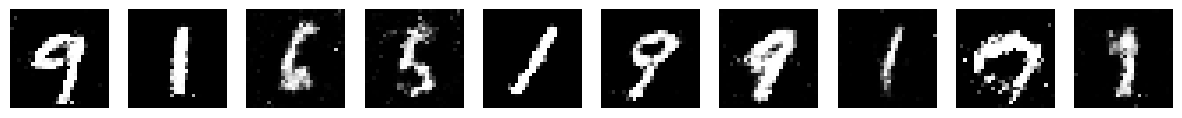

Epoch: 45/200 | Generator Loss: 1.3785742498410027 | Discriminator Loss: 0.48664719603463275


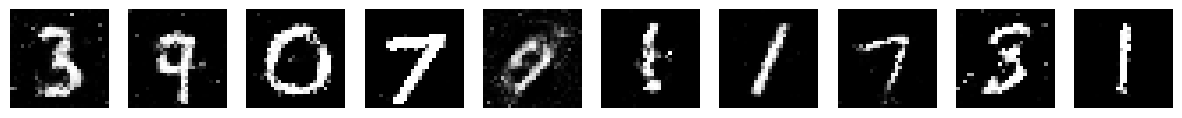

Epoch: 46/200 | Generator Loss: 1.376380622005666 | Discriminator Loss: 0.48591793053694116


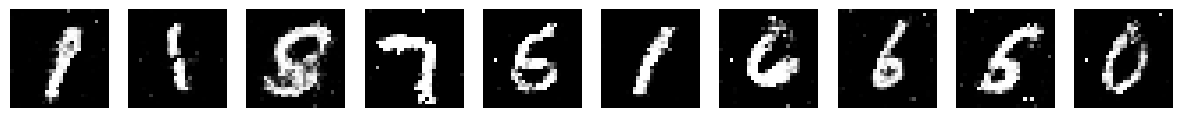

Epoch: 47/200 | Generator Loss: 1.3715943941937836 | Discriminator Loss: 0.48752276958433044


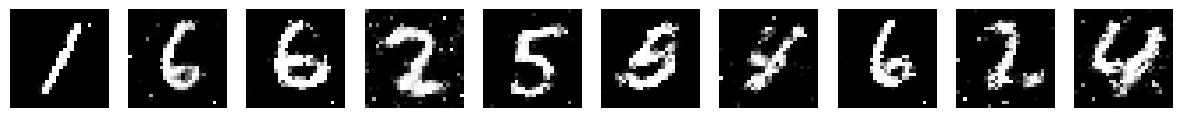

Epoch: 48/200 | Generator Loss: 1.3510603368409406 | Discriminator Loss: 0.4933971824930675


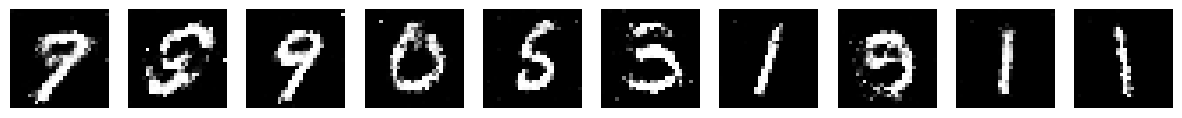

Epoch: 49/200 | Generator Loss: 1.3427747157590983 | Discriminator Loss: 0.4978841178452791


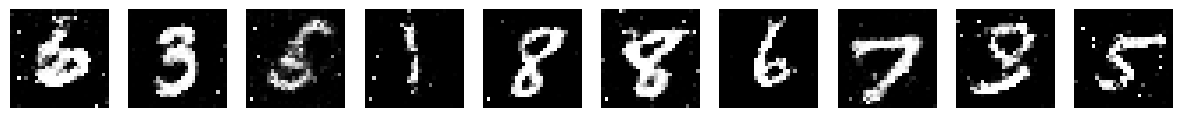

Epoch: 50/200 | Generator Loss: 1.3451841891701541 | Discriminator Loss: 0.4973852026945492


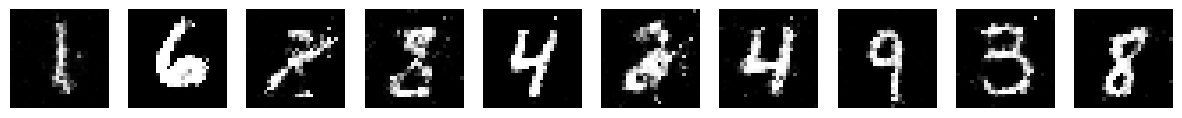

Epoch: 51/200 | Generator Loss: 1.3331844801587591 | Discriminator Loss: 0.5016592501450196


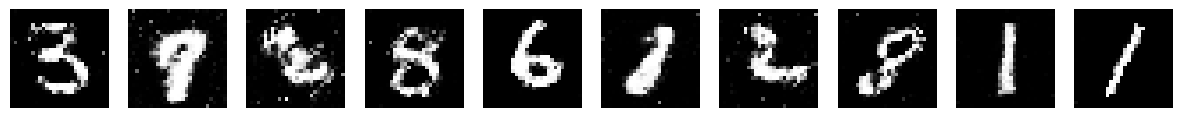

Epoch: 52/200 | Generator Loss: 1.338760178734753 | Discriminator Loss: 0.4976034630844588


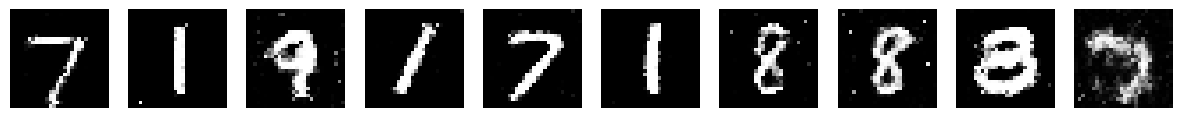

Epoch: 53/200 | Generator Loss: 1.3231850087261403 | Discriminator Loss: 0.5017129010610235


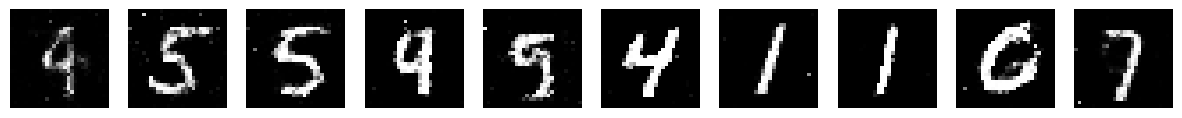

Epoch: 54/200 | Generator Loss: 1.337970853868578 | Discriminator Loss: 0.5004547177347293


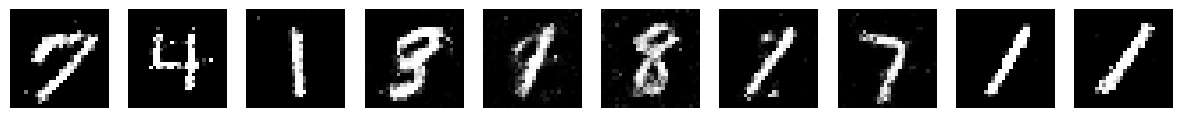

Epoch: 55/200 | Generator Loss: 1.308293745970167 | Discriminator Loss: 0.5070846935452175


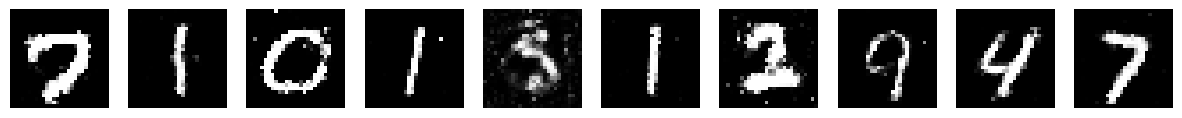

Epoch: 56/200 | Generator Loss: 1.3191330468476707 | Discriminator Loss: 0.5076772601746801


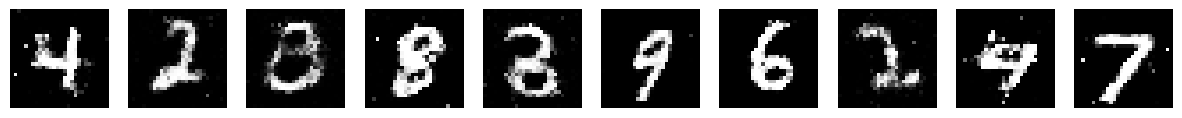

Epoch: 57/200 | Generator Loss: 1.318273163045139 | Discriminator Loss: 0.5062194173651209


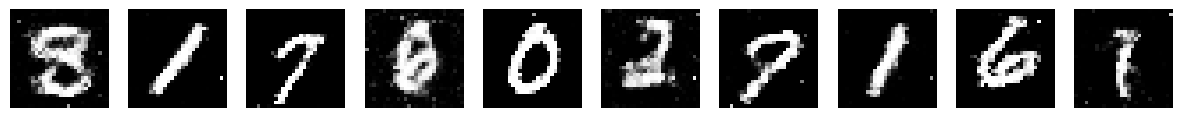

Epoch: 58/200 | Generator Loss: 1.297692868246961 | Discriminator Loss: 0.510466767081828


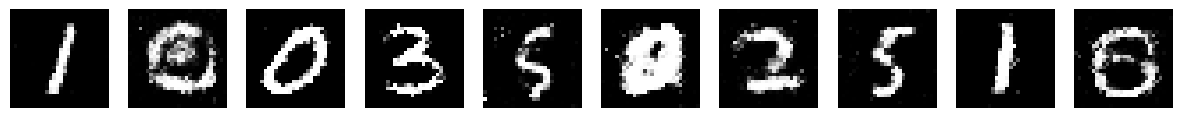

Epoch: 59/200 | Generator Loss: 1.3018110156821798 | Discriminator Loss: 0.5097228948241358


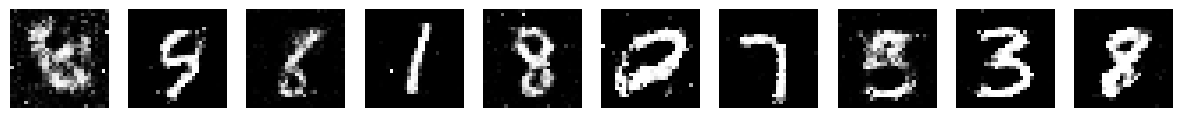

Epoch: 60/200 | Generator Loss: 1.3030075111877182 | Discriminator Loss: 0.5114840345342022


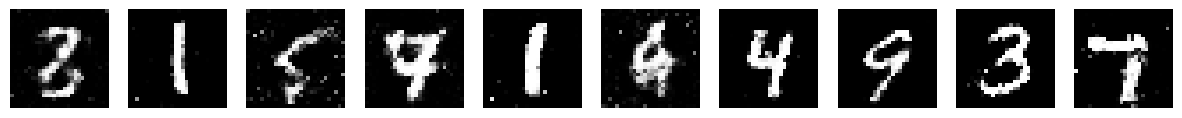

Epoch: 61/200 | Generator Loss: 1.2868573299603168 | Discriminator Loss: 0.5119247162011641


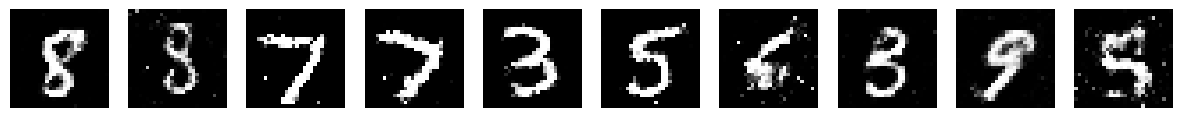

Epoch: 62/200 | Generator Loss: 1.3055923945868193 | Discriminator Loss: 0.5138337974355165


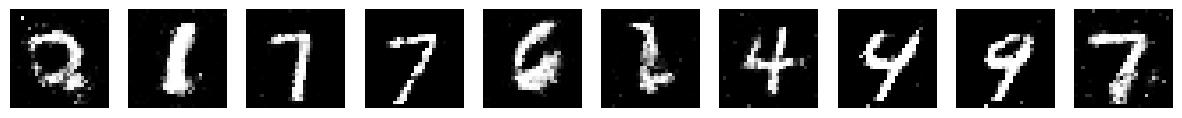

Epoch: 63/200 | Generator Loss: 1.2869048121133084 | Discriminator Loss: 0.5150438450546916


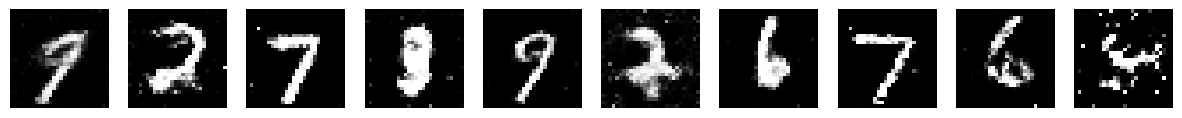

Epoch: 64/200 | Generator Loss: 1.2883227634023247 | Discriminator Loss: 0.5147163470797955


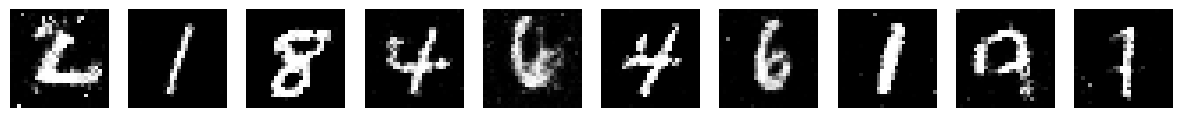

Epoch: 65/200 | Generator Loss: 1.2735776209882073 | Discriminator Loss: 0.517429599057891


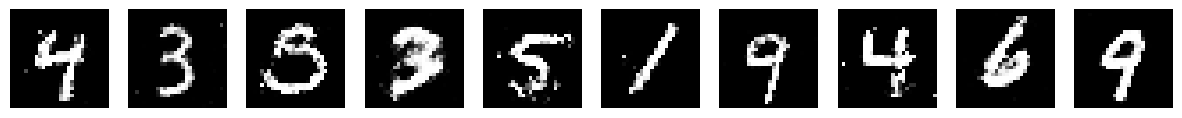

Epoch: 66/200 | Generator Loss: 1.2693267744233105 | Discriminator Loss: 0.5193729846080991


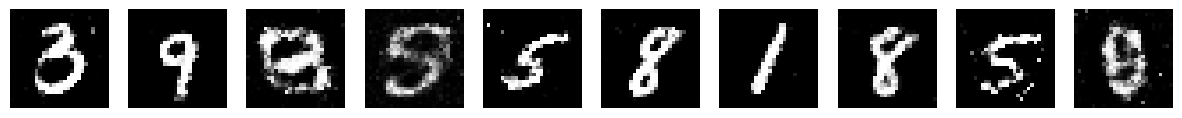

Epoch: 67/200 | Generator Loss: 1.2732123050100006 | Discriminator Loss: 0.5178795593506746


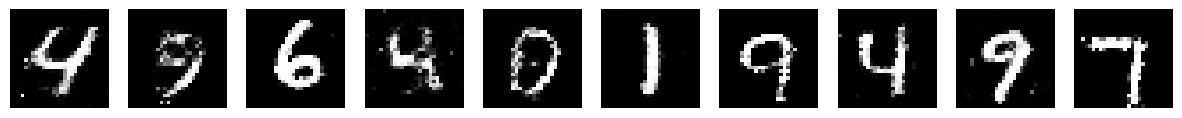

Epoch: 68/200 | Generator Loss: 1.2830193314725147 | Discriminator Loss: 0.5167567550119306


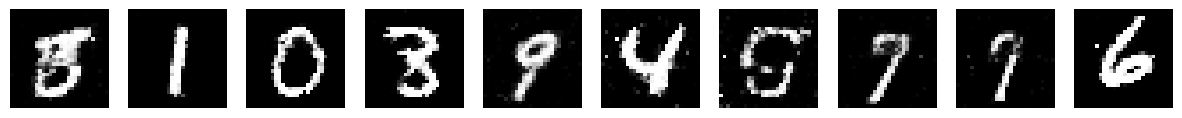

Epoch: 69/200 | Generator Loss: 1.267790258312022 | Discriminator Loss: 0.5208960056050754


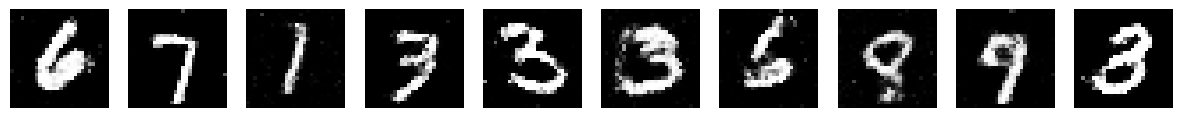

Epoch: 70/200 | Generator Loss: 1.257995643341211 | Discriminator Loss: 0.5213857312192286


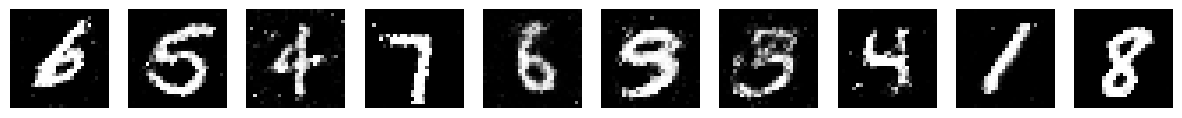

Epoch: 71/200 | Generator Loss: 1.2555995047219526 | Discriminator Loss: 0.5233792388744192


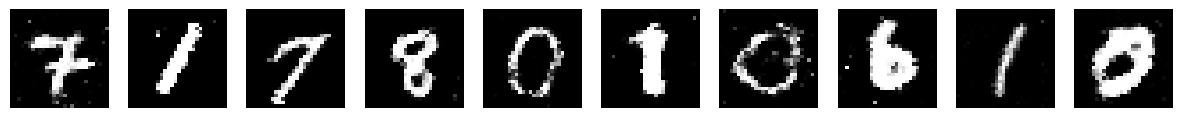

Epoch: 72/200 | Generator Loss: 1.2544388642697446 | Discriminator Loss: 0.5246573317406783


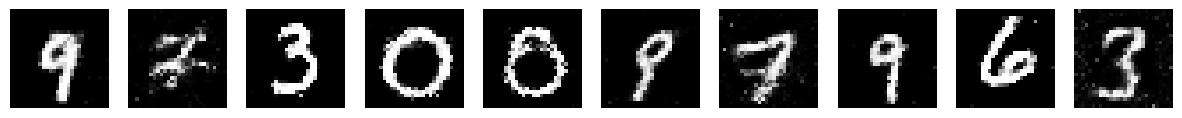

Epoch: 73/200 | Generator Loss: 1.2704798938877293 | Discriminator Loss: 0.5196469725449202


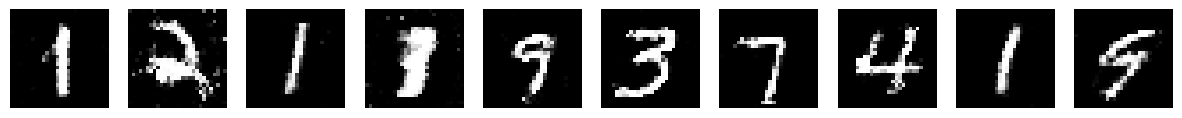

Epoch: 74/200 | Generator Loss: 1.2683667844292452 | Discriminator Loss: 0.5205416092232092


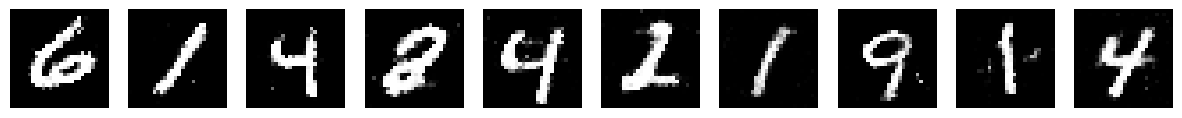

Epoch: 75/200 | Generator Loss: 1.2685379640125771 | Discriminator Loss: 0.5199908516935702


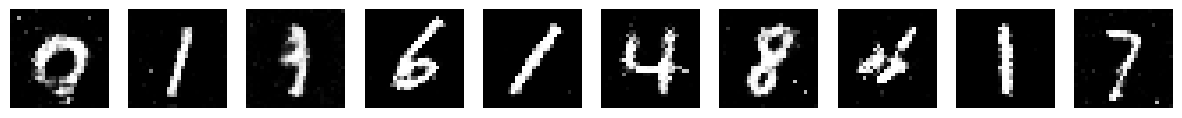

Epoch: 76/200 | Generator Loss: 1.2517218139888382 | Discriminator Loss: 0.5239774043371936


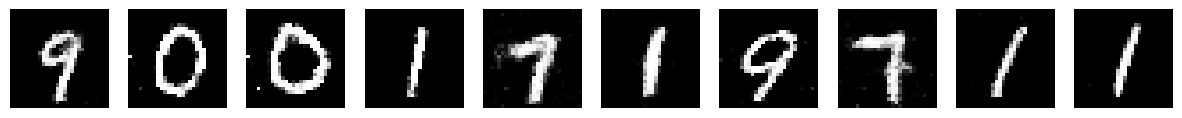

Epoch: 77/200 | Generator Loss: 1.2529863807946635 | Discriminator Loss: 0.5229887627462334


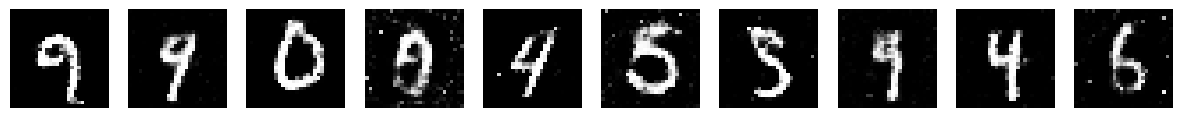

Epoch: 78/200 | Generator Loss: 1.2484106743005292 | Discriminator Loss: 0.5229679630128051


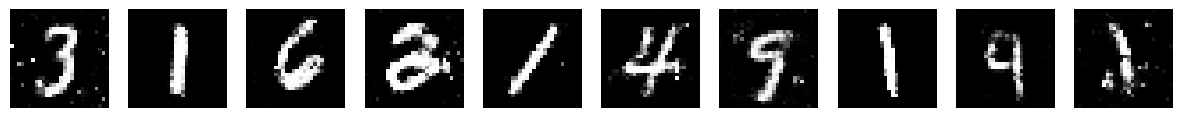

Epoch: 79/200 | Generator Loss: 1.2569624963345558 | Discriminator Loss: 0.5211496464987554


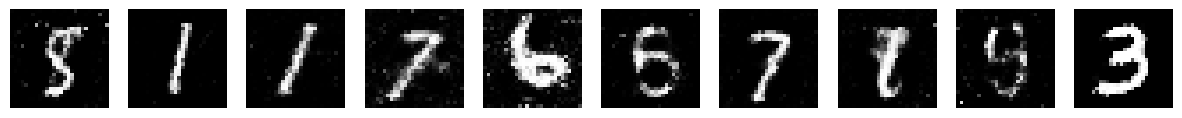

Epoch: 80/200 | Generator Loss: 1.2542277091601763 | Discriminator Loss: 0.5238719374767499


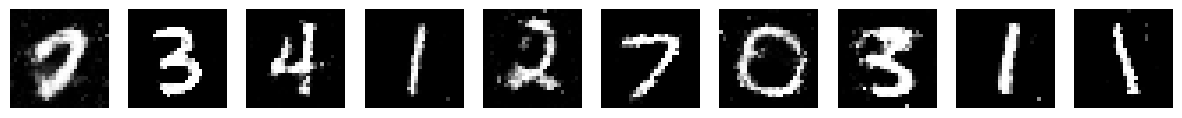

Epoch: 81/200 | Generator Loss: 1.2468170740965332 | Discriminator Loss: 0.5244977019870205


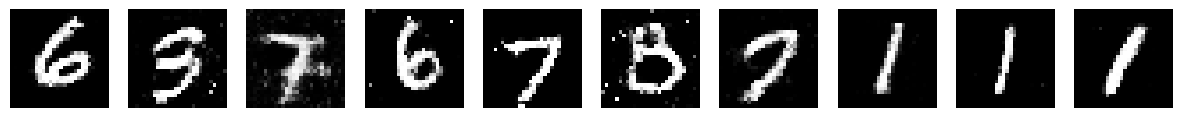

Epoch: 82/200 | Generator Loss: 1.2579401967876247 | Discriminator Loss: 0.5228515611147322


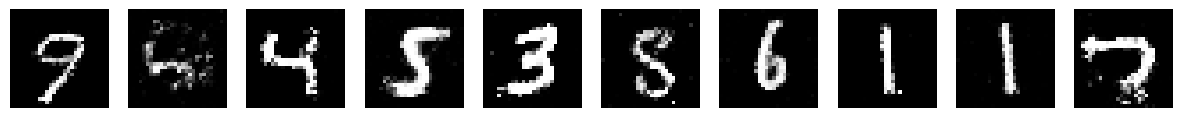

Epoch: 83/200 | Generator Loss: 1.2669157173587824 | Discriminator Loss: 0.5216252179796508


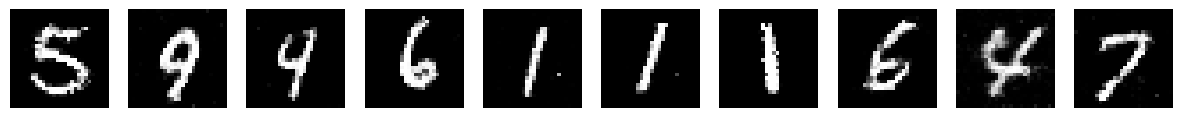

Epoch: 84/200 | Generator Loss: 1.2662680568471392 | Discriminator Loss: 0.5191488047398484


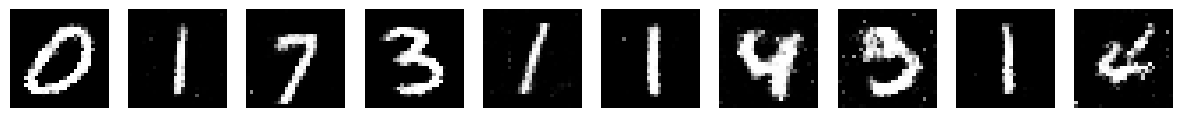

Epoch: 85/200 | Generator Loss: 1.258890316176262 | Discriminator Loss: 0.521912839494026


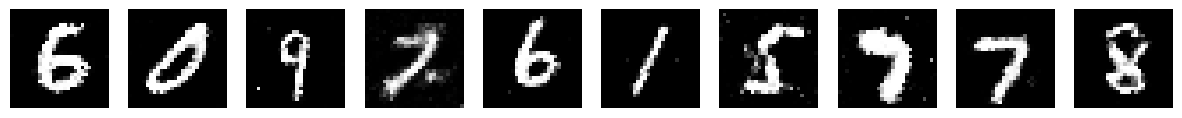

Epoch: 86/200 | Generator Loss: 1.257332154301438 | Discriminator Loss: 0.5229346450330861


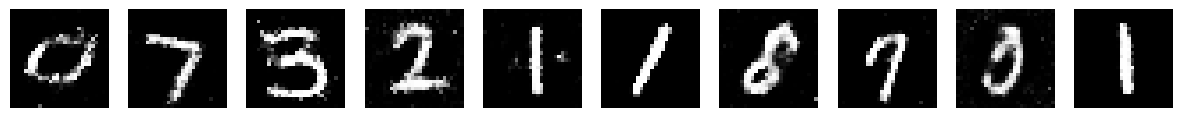

Epoch: 87/200 | Generator Loss: 1.2666609746052513 | Discriminator Loss: 0.5213581365562959


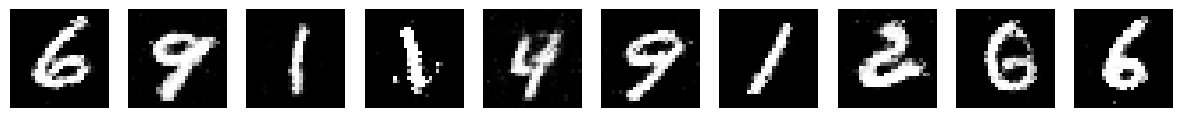

Epoch: 88/200 | Generator Loss: 1.2473132554401976 | Discriminator Loss: 0.5250652174451458


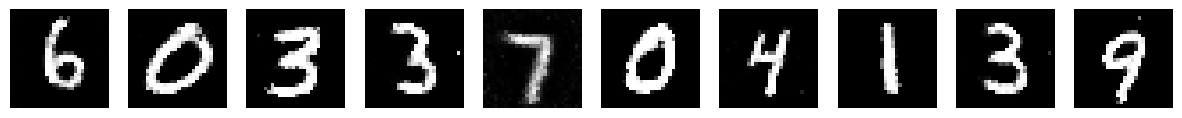

Epoch: 89/200 | Generator Loss: 1.2432758653087657 | Discriminator Loss: 0.5259559694637876


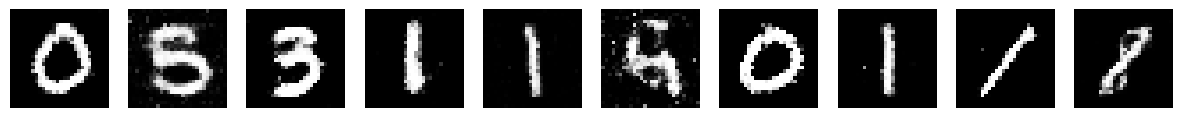

Epoch: 90/200 | Generator Loss: 1.2461469785999388 | Discriminator Loss: 0.5235866337442703


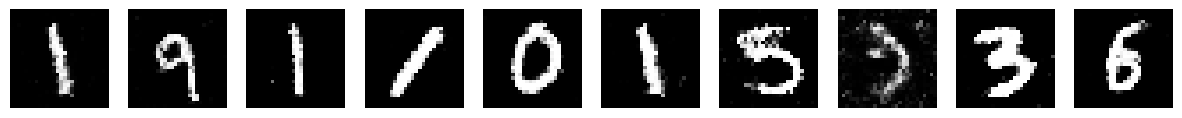

Epoch: 91/200 | Generator Loss: 1.2550029815641293 | Discriminator Loss: 0.522927905641385


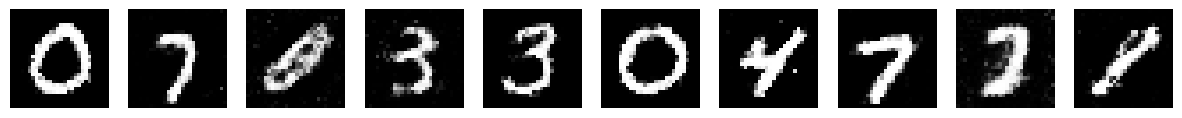

Epoch: 92/200 | Generator Loss: 1.2536175149336044 | Discriminator Loss: 0.5226906560885627


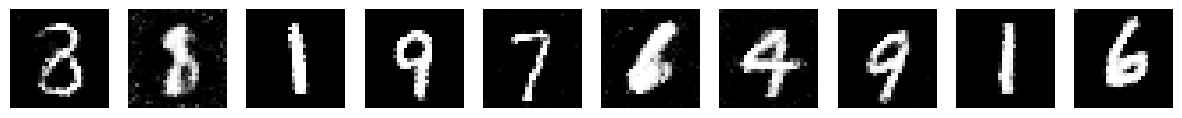

Epoch: 93/200 | Generator Loss: 1.2537080054598322 | Discriminator Loss: 0.5226073688281371


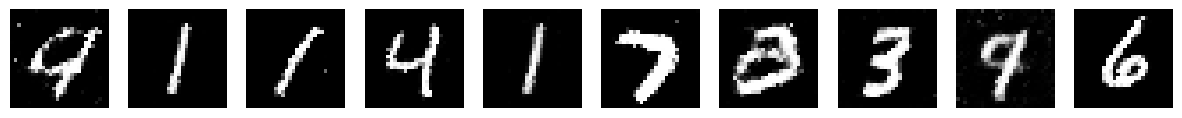

Epoch: 94/200 | Generator Loss: 1.2565870366371008 | Discriminator Loss: 0.5226010025055932


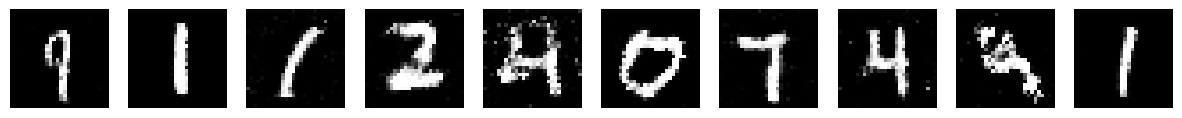

Epoch: 95/200 | Generator Loss: 1.258549296271318 | Discriminator Loss: 0.5239710603187333


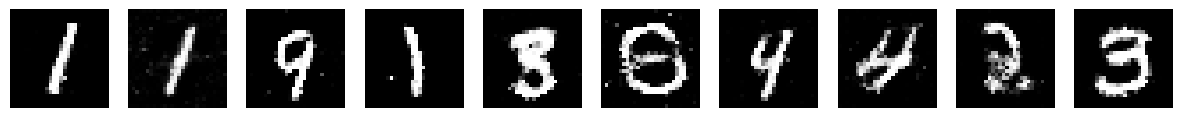

Epoch: 96/200 | Generator Loss: 1.2603264958111209 | Discriminator Loss: 0.5211142672023286


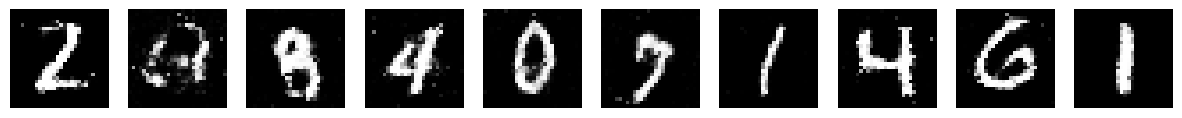

Epoch: 97/200 | Generator Loss: 1.2613718479172762 | Discriminator Loss: 0.5212018496827531


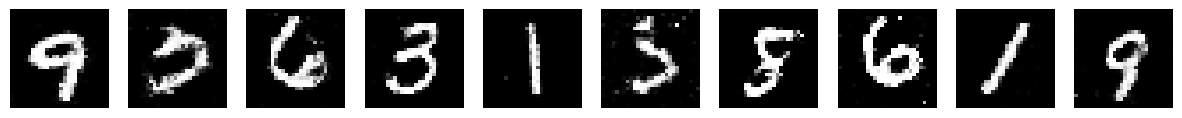

Epoch: 98/200 | Generator Loss: 1.265073187315642 | Discriminator Loss: 0.5188448225765594


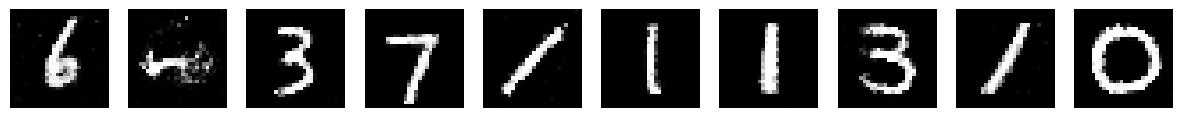

Epoch: 99/200 | Generator Loss: 1.2689710324252848 | Discriminator Loss: 0.5185482806996751


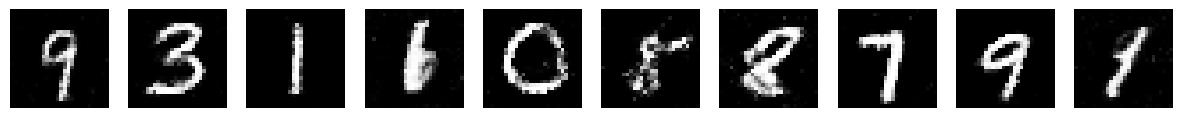

Epoch: 100/200 | Generator Loss: 1.2571004303787816 | Discriminator Loss: 0.5237985573597809


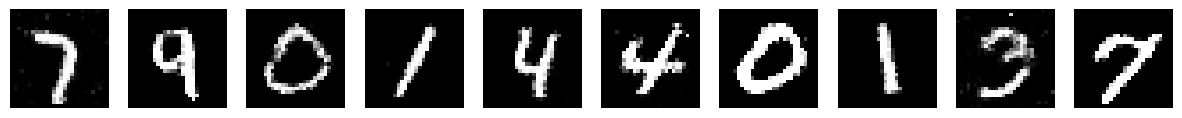

Epoch: 101/200 | Generator Loss: 1.2480360389009977 | Discriminator Loss: 0.5232693541532895


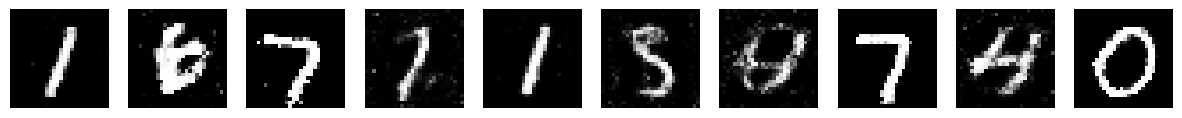

Epoch: 102/200 | Generator Loss: 1.2643086808576767 | Discriminator Loss: 0.5195503814388186


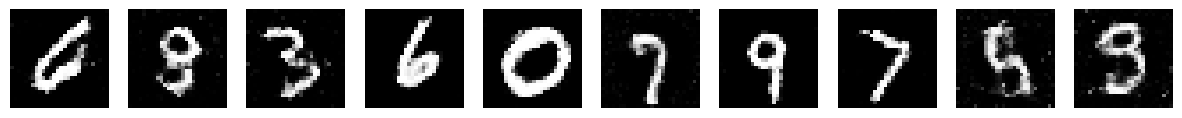

Epoch: 103/200 | Generator Loss: 1.2620986684807327 | Discriminator Loss: 0.5195839790774307


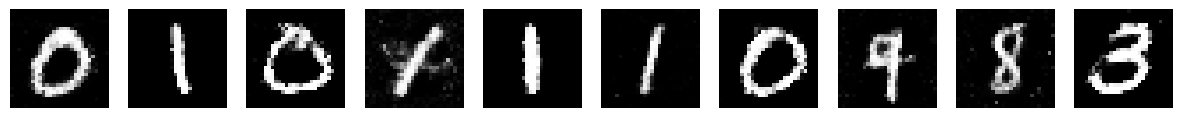

Epoch: 104/200 | Generator Loss: 1.2614861144694185 | Discriminator Loss: 0.5204036340022138


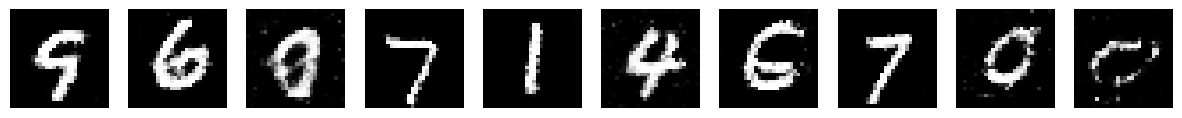

Epoch: 105/200 | Generator Loss: 1.2674057463338888 | Discriminator Loss: 0.5193759422185324


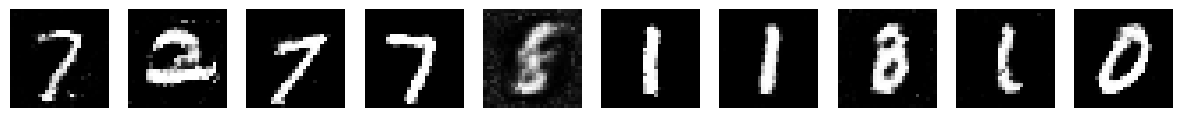

Epoch: 106/200 | Generator Loss: 1.2726515590000762 | Discriminator Loss: 0.5192018229442873


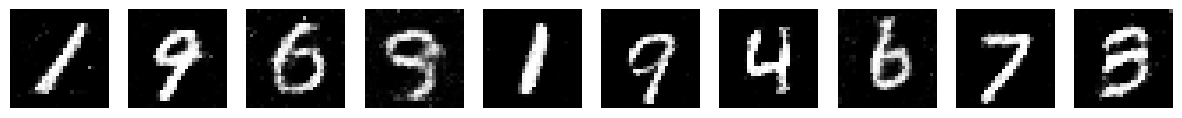

Epoch: 107/200 | Generator Loss: 1.2587742431839901 | Discriminator Loss: 0.5222046446444383


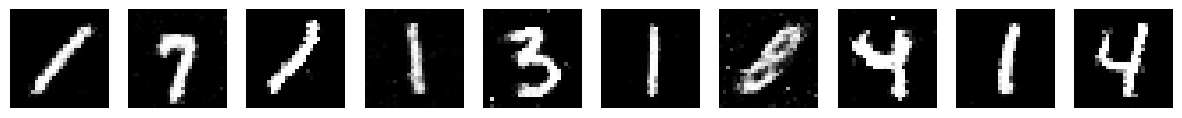

Epoch: 108/200 | Generator Loss: 1.2671415851568617 | Discriminator Loss: 0.5188201690660611


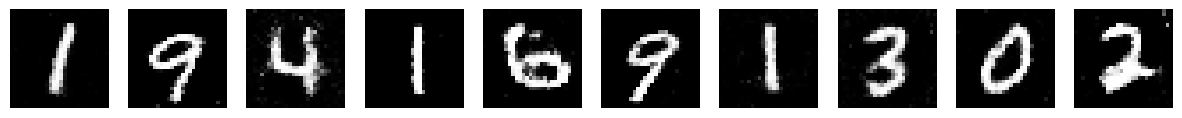

Epoch: 109/200 | Generator Loss: 1.2561522417231155 | Discriminator Loss: 0.5226613468706989


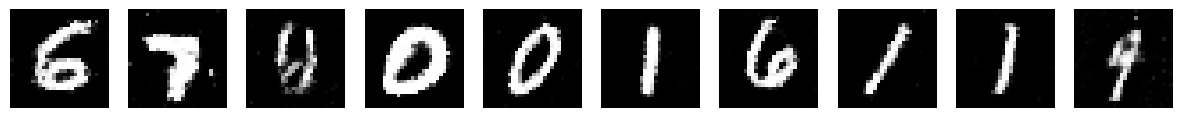

Epoch: 110/200 | Generator Loss: 1.2668628590955917 | Discriminator Loss: 0.5216969076885598


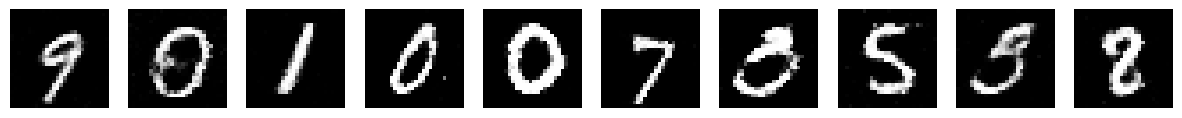

Epoch: 111/200 | Generator Loss: 1.26790495239087 | Discriminator Loss: 0.5179520363746676


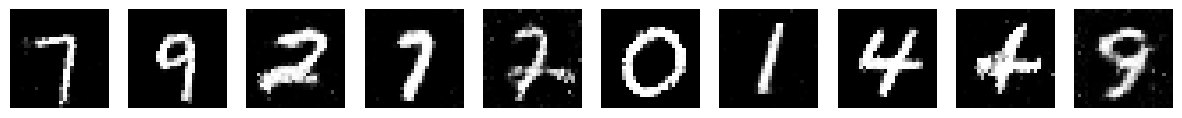

Epoch: 112/200 | Generator Loss: 1.2586693557849062 | Discriminator Loss: 0.5219661189294827


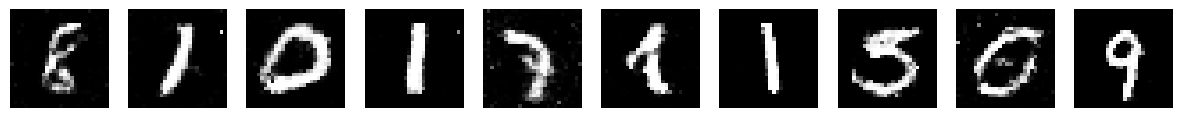

Epoch: 113/200 | Generator Loss: 1.2670151895043185 | Discriminator Loss: 0.5197533020205589


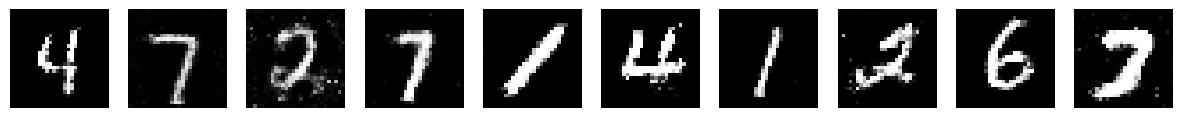

Epoch: 114/200 | Generator Loss: 1.2765016024554972 | Discriminator Loss: 0.5192844285639618


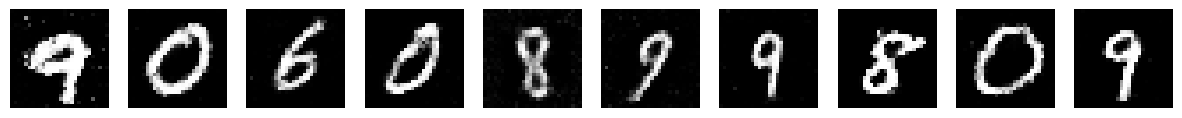

Epoch: 115/200 | Generator Loss: 1.269481902946033 | Discriminator Loss: 0.5186231207491746


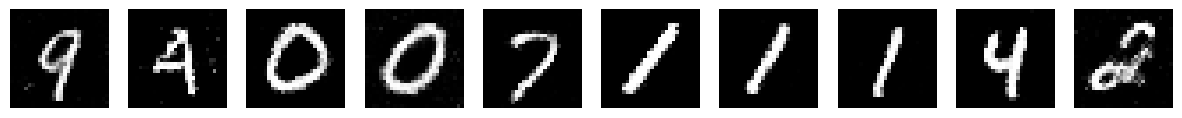

Epoch: 116/200 | Generator Loss: 1.2818381006021236 | Discriminator Loss: 0.5151722185266043


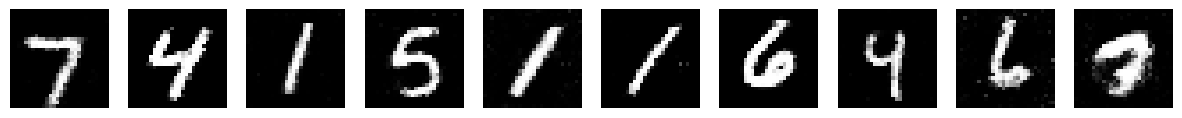

Epoch: 117/200 | Generator Loss: 1.266483997993632 | Discriminator Loss: 0.5179303435247335


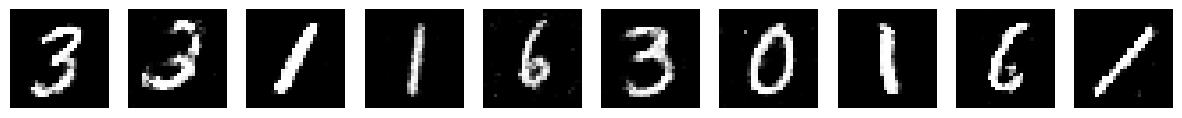

Epoch: 118/200 | Generator Loss: 1.2856768635290263 | Discriminator Loss: 0.5168539564619695


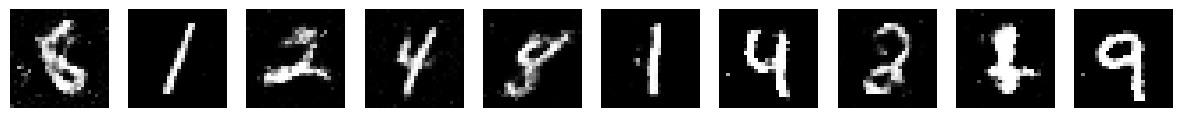

Epoch: 119/200 | Generator Loss: 1.2941957140273885 | Discriminator Loss: 0.5152091156445078


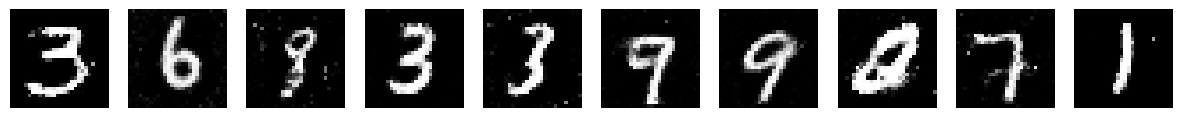

Epoch: 120/200 | Generator Loss: 1.27924343034911 | Discriminator Loss: 0.5173394708618172


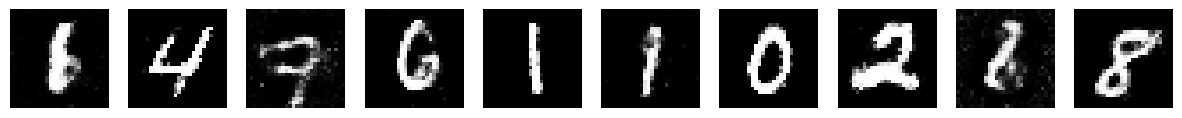

Epoch: 121/200 | Generator Loss: 1.2817329402163085 | Discriminator Loss: 0.5190300835348142


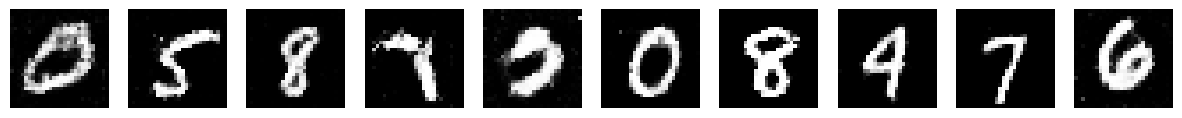

Epoch: 122/200 | Generator Loss: 1.2841556433167285 | Discriminator Loss: 0.5150537011084526


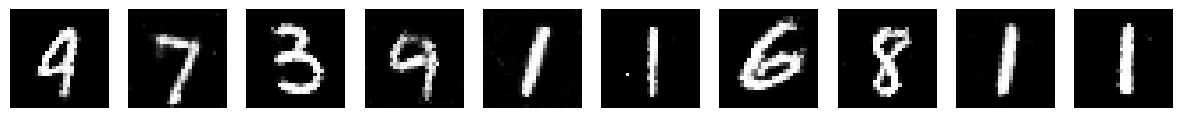

Epoch: 123/200 | Generator Loss: 1.288070731579876 | Discriminator Loss: 0.5147751541152946


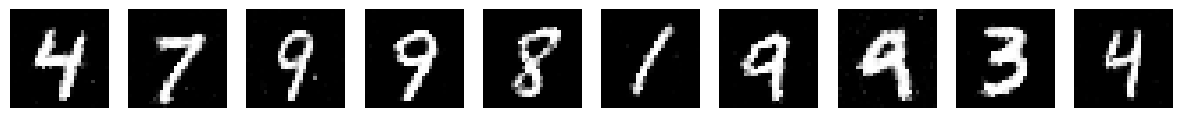

Epoch: 124/200 | Generator Loss: 1.298756803022519 | Discriminator Loss: 0.5125432084364169


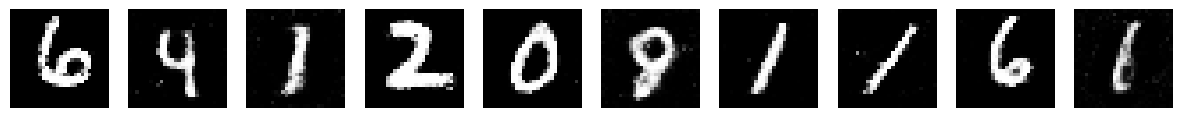

Epoch: 125/200 | Generator Loss: 1.294808228386999 | Discriminator Loss: 0.5115773417293898


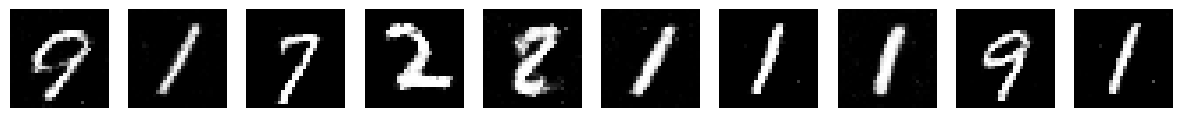

Epoch: 126/200 | Generator Loss: 1.300606654905307 | Discriminator Loss: 0.5118238013436291


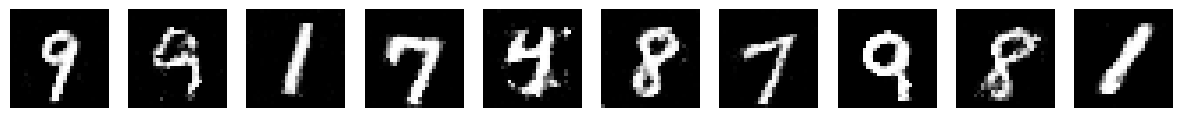

Epoch: 127/200 | Generator Loss: 1.3105282420034348 | Discriminator Loss: 0.5109556177531732


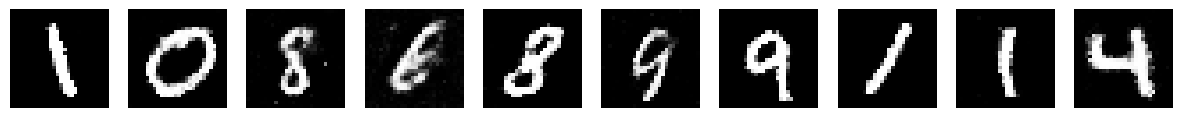

Epoch: 128/200 | Generator Loss: 1.2986701020299753 | Discriminator Loss: 0.512303066469713


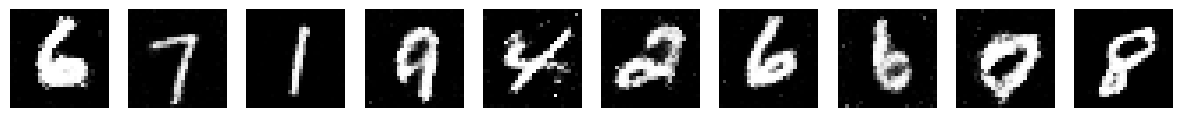

Epoch: 129/200 | Generator Loss: 1.3022439929722214 | Discriminator Loss: 0.5113800160412086


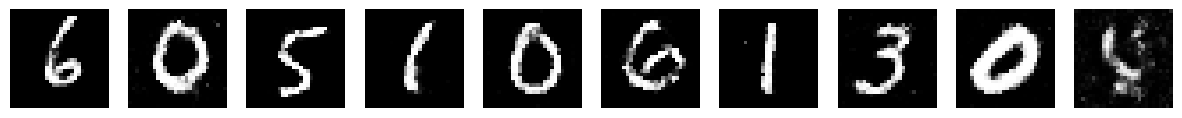

Epoch: 130/200 | Generator Loss: 1.3045896589120567 | Discriminator Loss: 0.5110821603839077


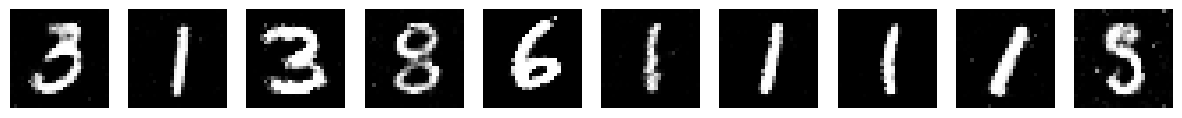

Epoch: 131/200 | Generator Loss: 1.292827356598779 | Discriminator Loss: 0.5123457550239969


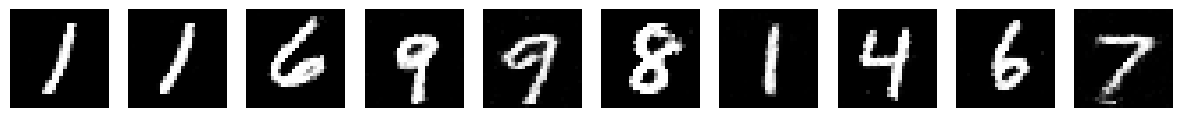

Epoch: 132/200 | Generator Loss: 1.3163240944652923 | Discriminator Loss: 0.5077743616058374


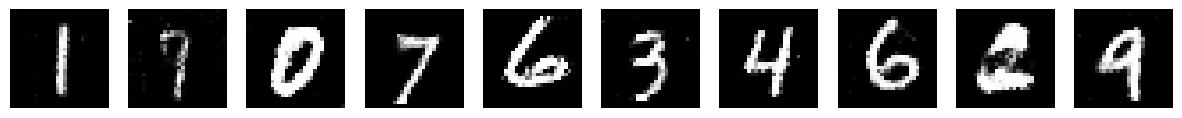

Epoch: 133/200 | Generator Loss: 1.3119815694752024 | Discriminator Loss: 0.5086040936553402


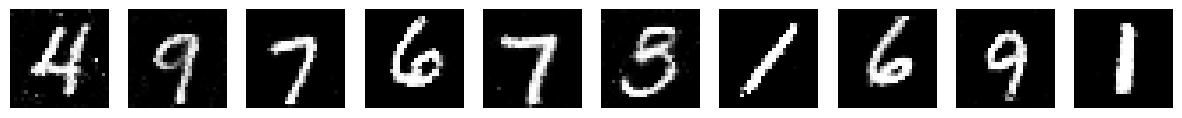

Epoch: 134/200 | Generator Loss: 1.2936669397455798 | Discriminator Loss: 0.5133593525332428


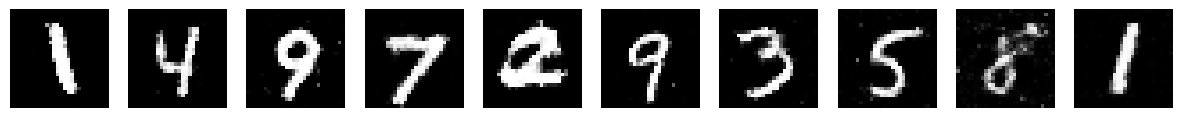

Epoch: 135/200 | Generator Loss: 1.3083224471952362 | Discriminator Loss: 0.5115033101552585


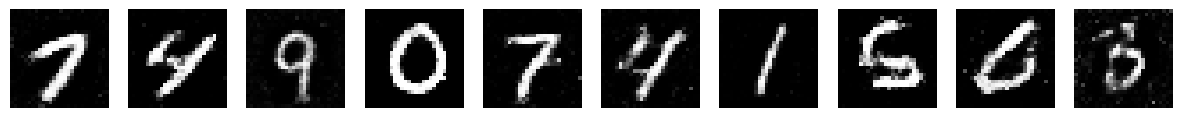

Epoch: 136/200 | Generator Loss: 1.3106724173783748 | Discriminator Loss: 0.510498938275807


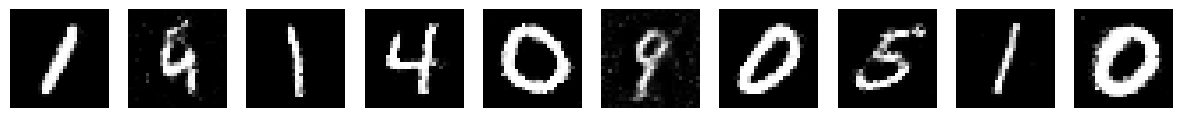

Epoch: 137/200 | Generator Loss: 1.3125148787935659 | Discriminator Loss: 0.5094052609731393


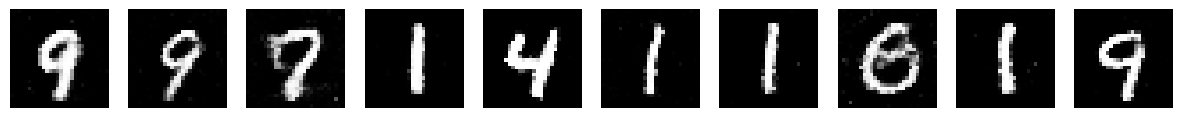

Epoch: 138/200 | Generator Loss: 1.3122950726226448 | Discriminator Loss: 0.5090713216297662


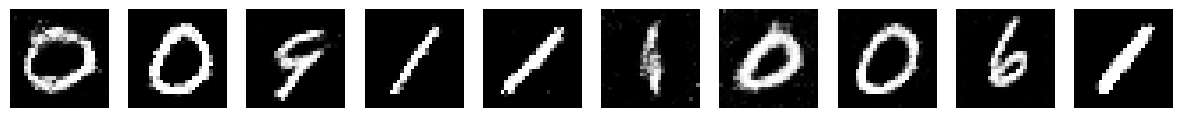

Epoch: 139/200 | Generator Loss: 1.3214621731975693 | Discriminator Loss: 0.5082963679645107


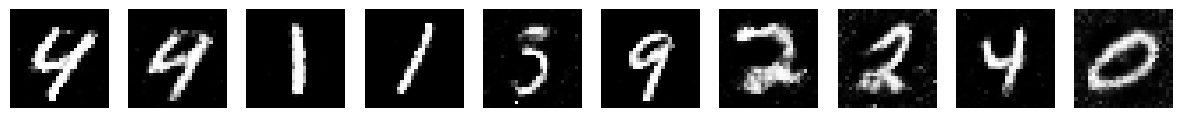

Epoch: 140/200 | Generator Loss: 1.3254848273832407 | Discriminator Loss: 0.5057012283090335


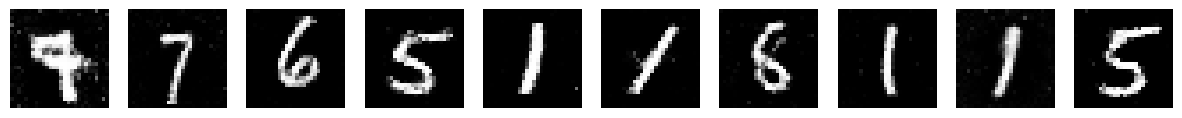

Epoch: 141/200 | Generator Loss: 1.3238329635754322 | Discriminator Loss: 0.5057757011354606


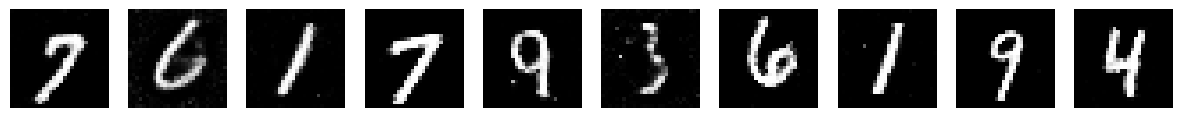

Epoch: 142/200 | Generator Loss: 1.3391328617962184 | Discriminator Loss: 0.5049411132772849


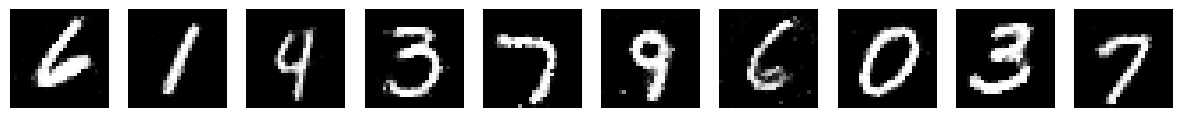

Epoch: 143/200 | Generator Loss: 1.3249219633114617 | Discriminator Loss: 0.5042743512562343


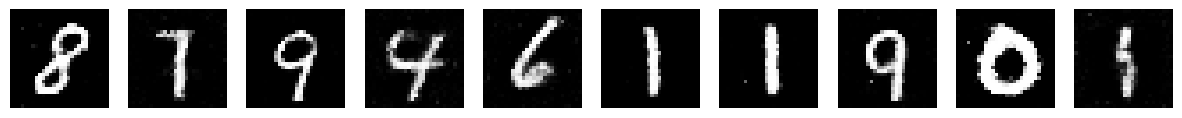

Epoch: 144/200 | Generator Loss: 1.3250954031690096 | Discriminator Loss: 0.5062266238716874


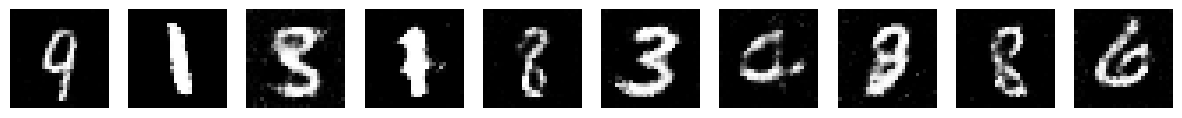

Epoch: 145/200 | Generator Loss: 1.3224581833333096 | Discriminator Loss: 0.5051555497559912


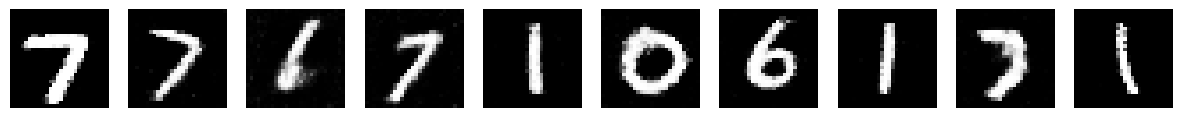

Epoch: 146/200 | Generator Loss: 1.3231435706620531 | Discriminator Loss: 0.5052337678256573


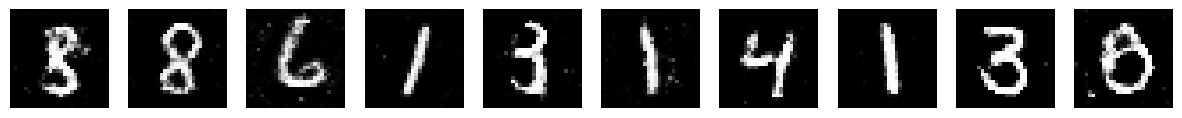

Epoch: 147/200 | Generator Loss: 1.330753323111707 | Discriminator Loss: 0.5014646031709113


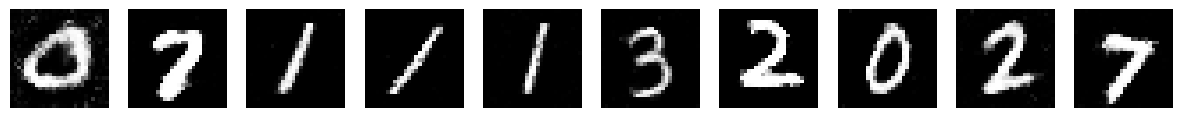

Epoch: 148/200 | Generator Loss: 1.3360856840097066 | Discriminator Loss: 0.5026451715909596


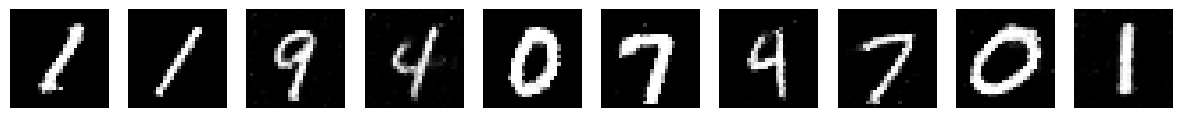

Epoch: 149/200 | Generator Loss: 1.3188957128443444 | Discriminator Loss: 0.5079125467775218


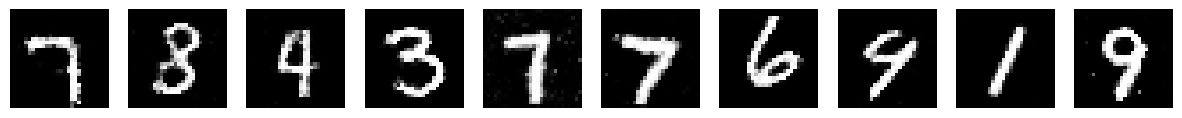

Epoch: 150/200 | Generator Loss: 1.3307345986112094 | Discriminator Loss: 0.504719917517481


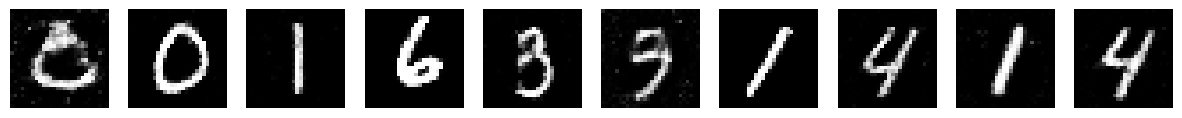

Epoch: 151/200 | Generator Loss: 1.3255782696738172 | Discriminator Loss: 0.5045049427541842


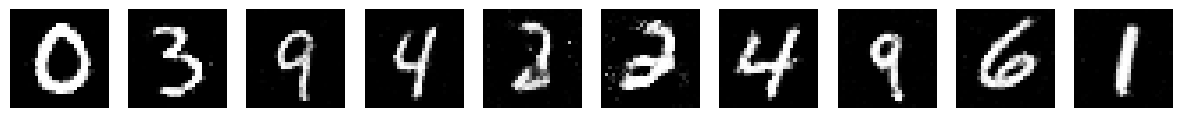

Epoch: 152/200 | Generator Loss: 1.34183119151638 | Discriminator Loss: 0.5022874347436657


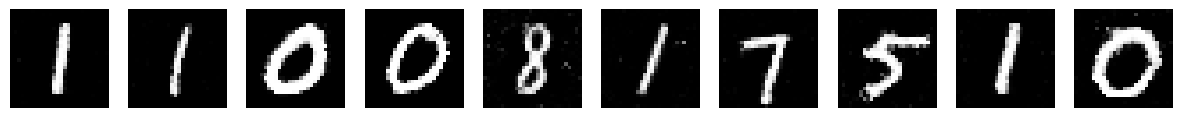

Epoch: 153/200 | Generator Loss: 1.351061685761409 | Discriminator Loss: 0.5020412218087772


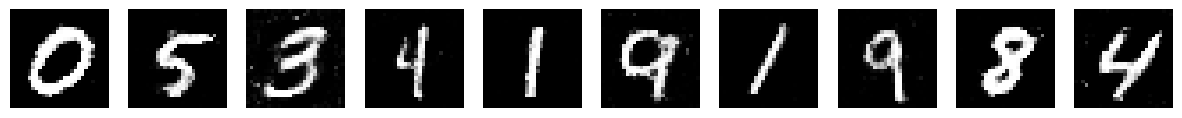

Epoch: 154/200 | Generator Loss: 1.344496973033653 | Discriminator Loss: 0.5018109888918618


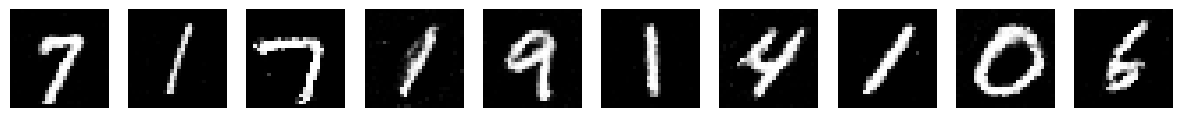

Epoch: 155/200 | Generator Loss: 1.3483188780131878 | Discriminator Loss: 0.5014893188278304


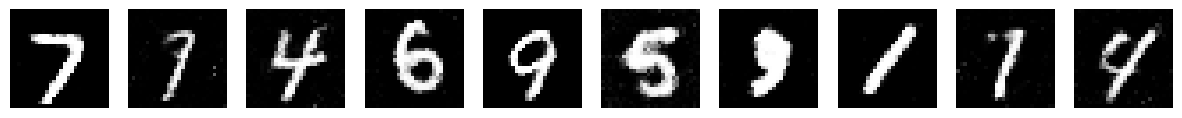

Epoch: 156/200 | Generator Loss: 1.3561282465452833 | Discriminator Loss: 0.4990385395250341


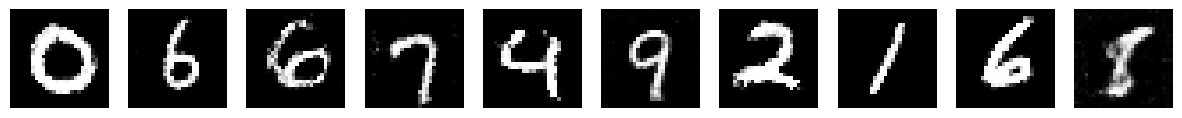

Epoch: 157/200 | Generator Loss: 1.3525491731761614 | Discriminator Loss: 0.49826472184297116


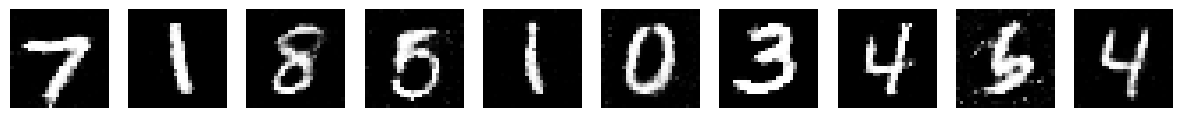

Epoch: 158/200 | Generator Loss: 1.3413432772988196 | Discriminator Loss: 0.5019310354423929


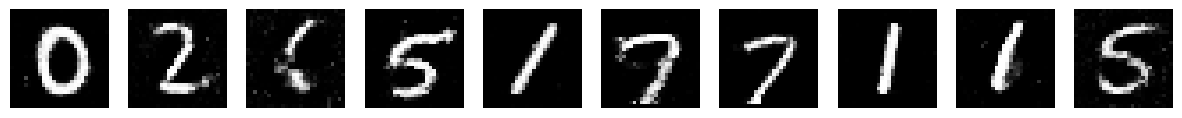

Epoch: 159/200 | Generator Loss: 1.3596545529009691 | Discriminator Loss: 0.49815550484636956


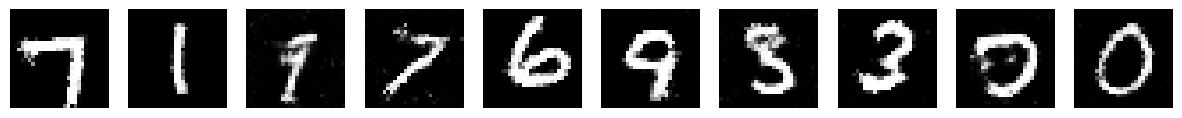

Epoch: 160/200 | Generator Loss: 1.3674820033726154 | Discriminator Loss: 0.4960872201777216


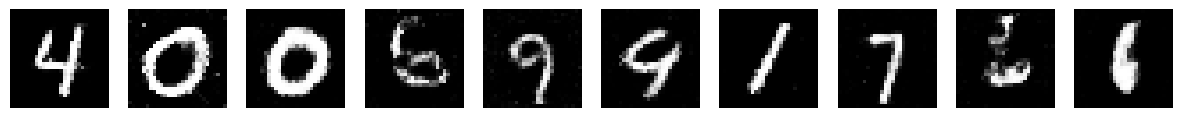

Epoch: 161/200 | Generator Loss: 1.36649463146226 | Discriminator Loss: 0.4979585136558964


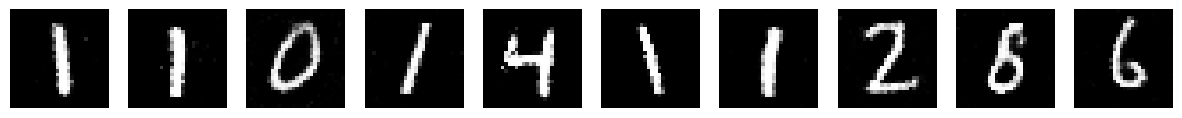

Epoch: 162/200 | Generator Loss: 1.3632347527851683 | Discriminator Loss: 0.4973908061666021


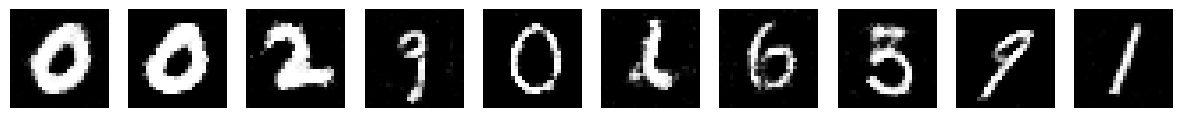

Epoch: 163/200 | Generator Loss: 1.3573855466679978 | Discriminator Loss: 0.4986458009621228


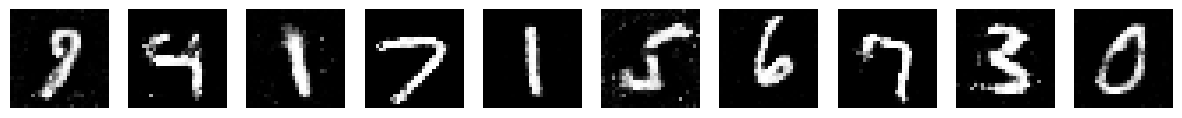

Epoch: 164/200 | Generator Loss: 1.3566517415585548 | Discriminator Loss: 0.4964089197263535


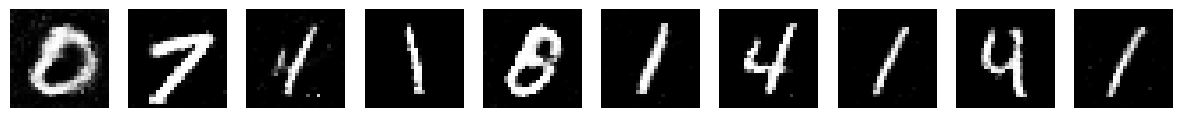

Epoch: 165/200 | Generator Loss: 1.3600762014958396 | Discriminator Loss: 0.49622030762721225


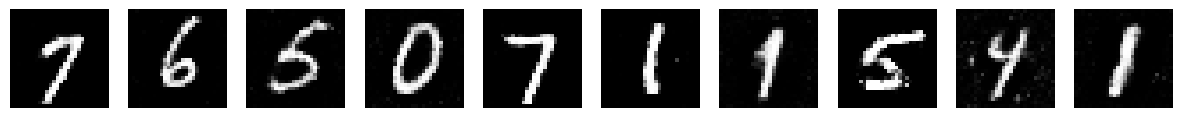

Epoch: 166/200 | Generator Loss: 1.3629749154231188 | Discriminator Loss: 0.4951081120256168


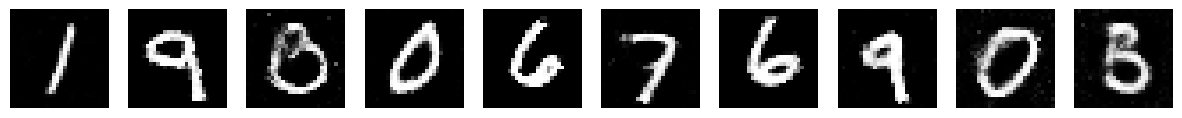

Epoch: 167/200 | Generator Loss: 1.3833678884546894 | Discriminator Loss: 0.4935292223496224


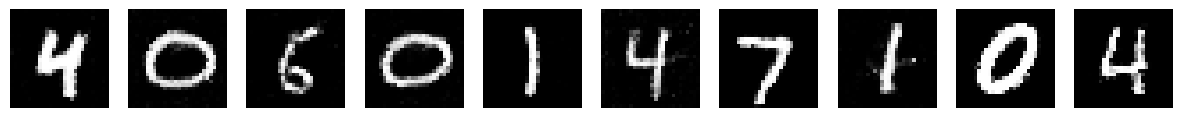

Epoch: 168/200 | Generator Loss: 1.5002426196263035 | Discriminator Loss: 0.49302602907233656


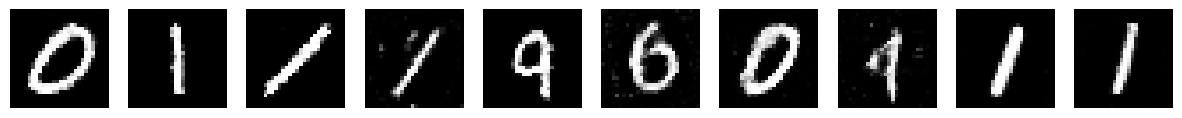

Epoch: 169/200 | Generator Loss: 1.3778065910725705 | Discriminator Loss: 0.49405563055579343


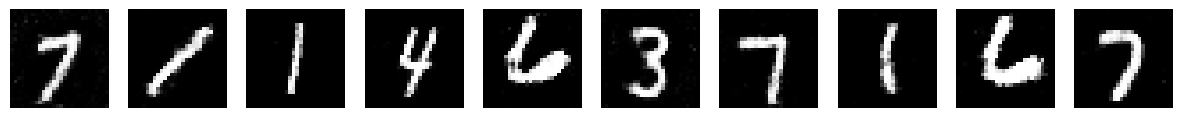

Epoch: 170/200 | Generator Loss: 1.384573447933075 | Discriminator Loss: 0.4917487644437534


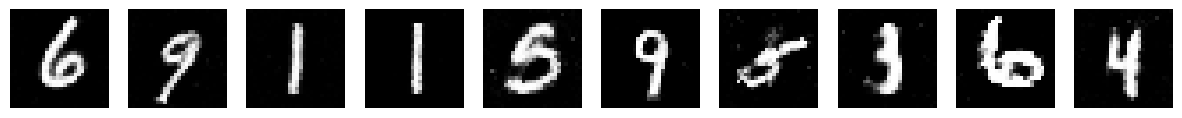

Epoch: 171/200 | Generator Loss: 1.378298282623291 | Discriminator Loss: 0.4925865195453294


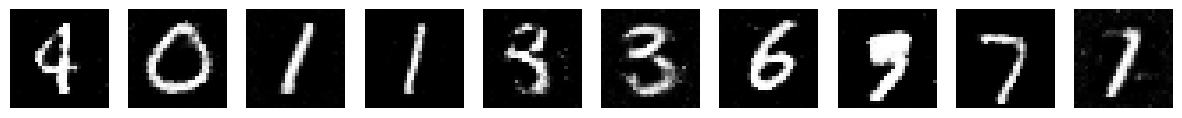

Epoch: 172/200 | Generator Loss: 1.3703677605972615 | Discriminator Loss: 0.4927587592398434


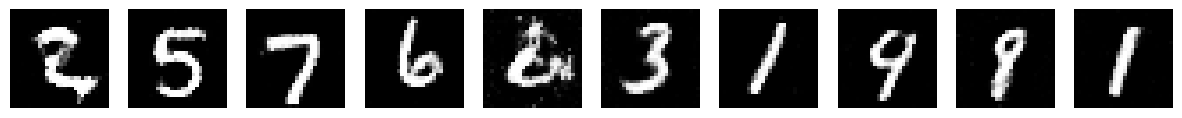

Epoch: 173/200 | Generator Loss: 1.3859757207858283 | Discriminator Loss: 0.4926680957457658


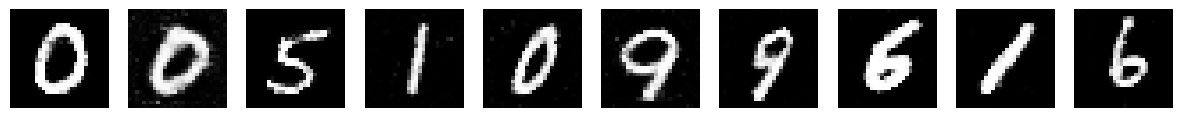

Epoch: 174/200 | Generator Loss: 1.3811944494369441 | Discriminator Loss: 0.49170819986095304


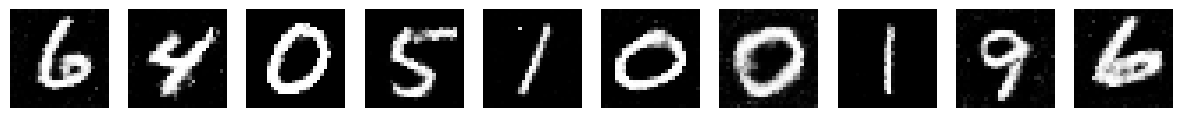

Epoch: 175/200 | Generator Loss: 1.385604398591178 | Discriminator Loss: 0.4904112194392727


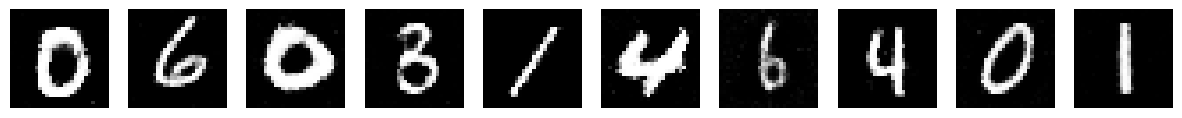

Epoch: 176/200 | Generator Loss: 1.388092942329358 | Discriminator Loss: 0.4917526011909249


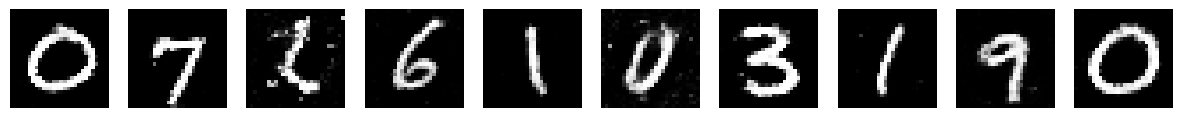

Epoch: 177/200 | Generator Loss: 1.395606348763651 | Discriminator Loss: 0.4874486115568482


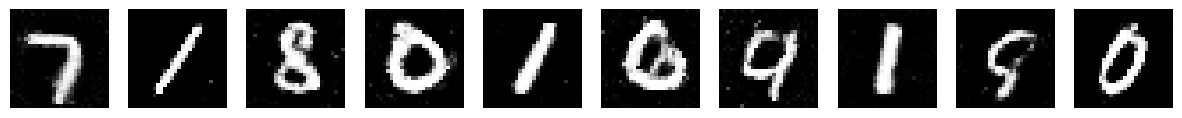

Epoch: 178/200 | Generator Loss: 1.3889798447013155 | Discriminator Loss: 0.48909252773978307


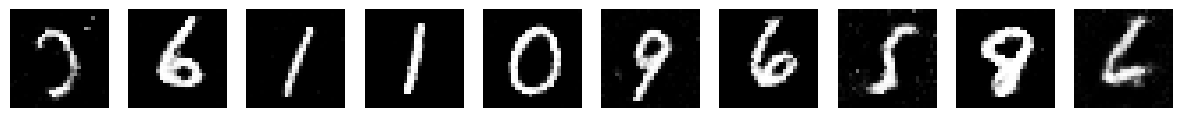

Epoch: 179/200 | Generator Loss: 1.375559482493126 | Discriminator Loss: 0.4910448347327552


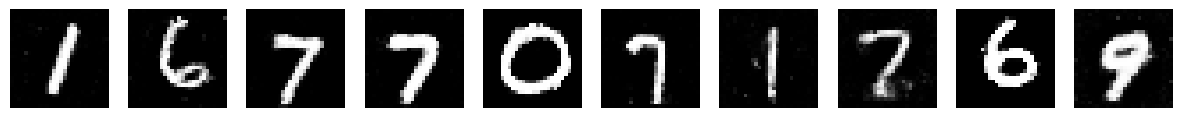

Epoch: 180/200 | Generator Loss: 1.3992286058885457 | Discriminator Loss: 0.48619233602399764


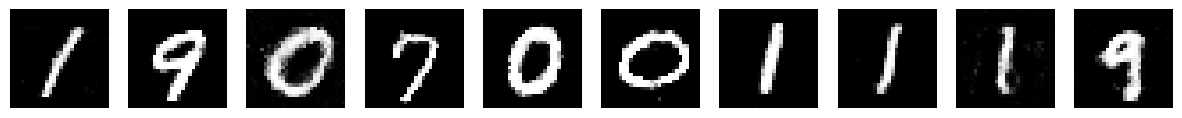

Epoch: 181/200 | Generator Loss: 1.4061774617827523 | Discriminator Loss: 0.48700876187668174


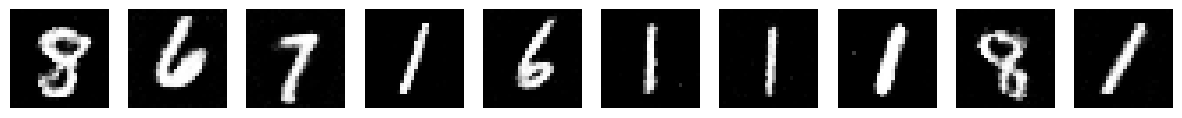

Epoch: 182/200 | Generator Loss: 1.4150563994450356 | Discriminator Loss: 0.48503898150885283


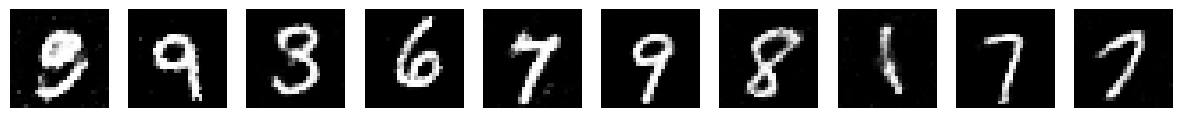

Epoch: 183/200 | Generator Loss: 1.400163532320116 | Discriminator Loss: 0.4888165026331253


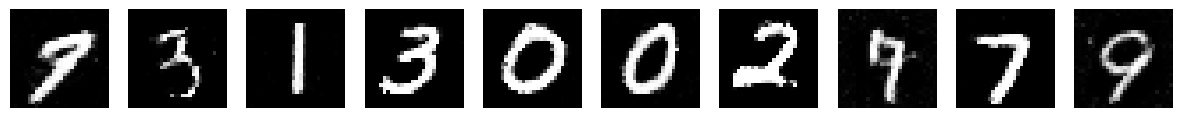

Epoch: 184/200 | Generator Loss: 1.3876301993185014 | Discriminator Loss: 0.4916301564748353


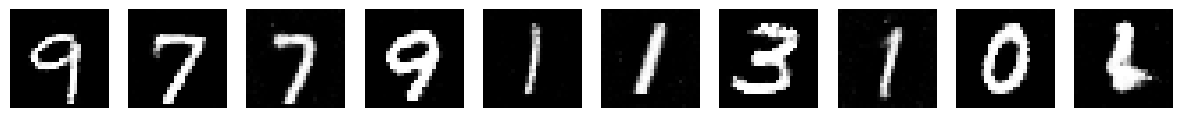

Epoch: 185/200 | Generator Loss: 1.3922047221076006 | Discriminator Loss: 0.48758163889333894


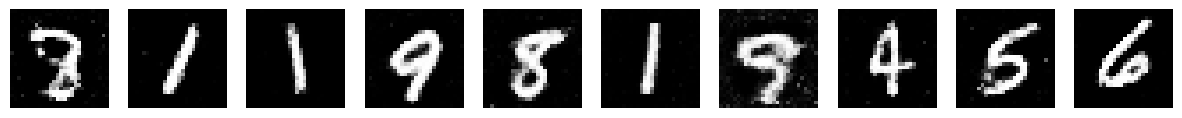

Epoch: 186/200 | Generator Loss: 1.3786931897023085 | Discriminator Loss: 0.49344823037637575


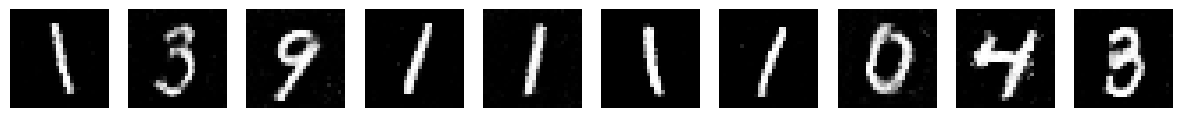

Epoch: 187/200 | Generator Loss: 1.3987486509880278 | Discriminator Loss: 0.48843548311861845


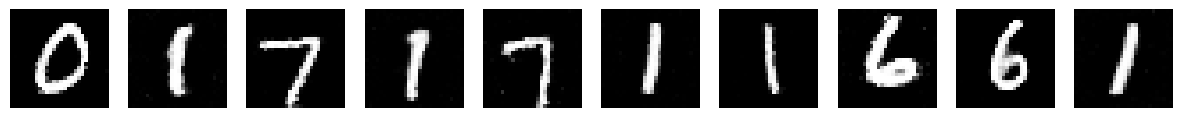

Epoch: 188/200 | Generator Loss: 1.3983571496345342 | Discriminator Loss: 0.4876479982440151


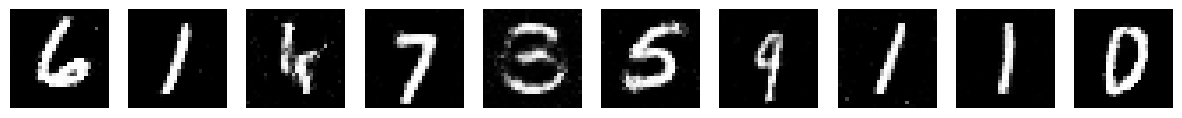

Epoch: 189/200 | Generator Loss: 1.4072107066477795 | Discriminator Loss: 0.4832555574140569


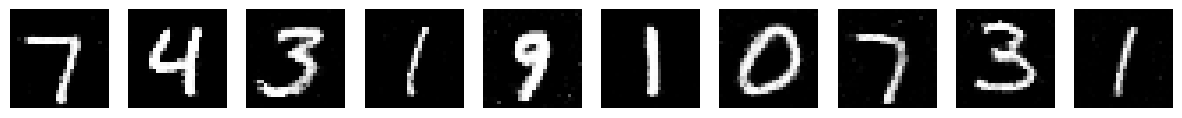

Epoch: 190/200 | Generator Loss: 1.4320799951105991 | Discriminator Loss: 0.481353887045053


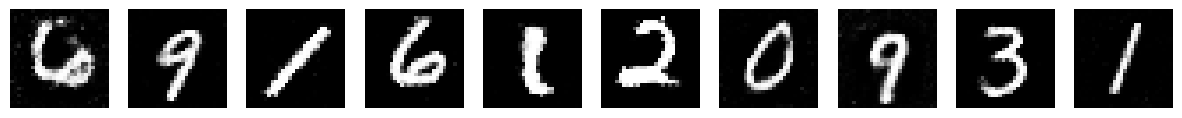

Epoch: 191/200 | Generator Loss: 1.405902574057264 | Discriminator Loss: 0.48710078782618427


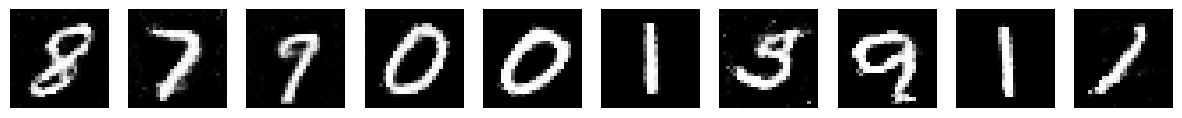

Epoch: 192/200 | Generator Loss: 1.3978815012649177 | Discriminator Loss: 0.48606514682901947


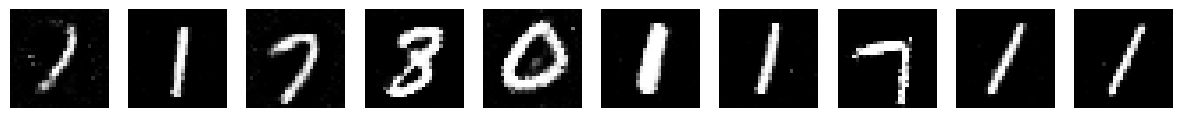

Epoch: 193/200 | Generator Loss: 1.422437337415813 | Discriminator Loss: 0.4833690868511891


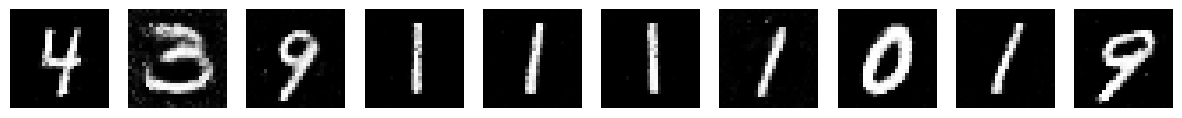

Epoch: 194/200 | Generator Loss: 1.4023968337187127 | Discriminator Loss: 0.48417868956065635


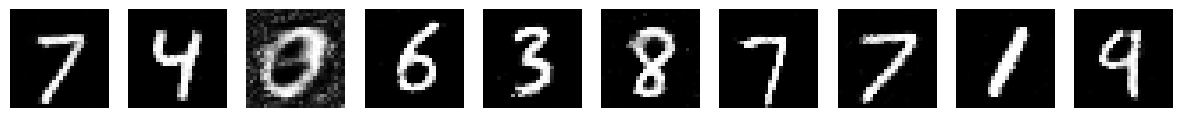

Epoch: 195/200 | Generator Loss: 1.408852290751329 | Discriminator Loss: 0.4827163475535826


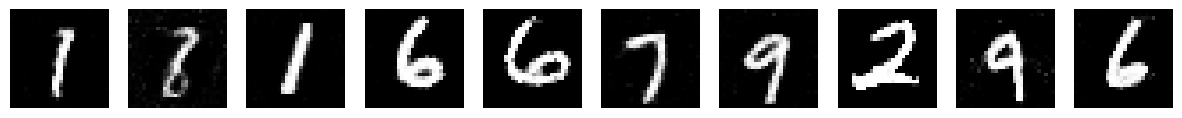

Epoch: 196/200 | Generator Loss: 1.4190627237372815 | Discriminator Loss: 0.48192209939458475


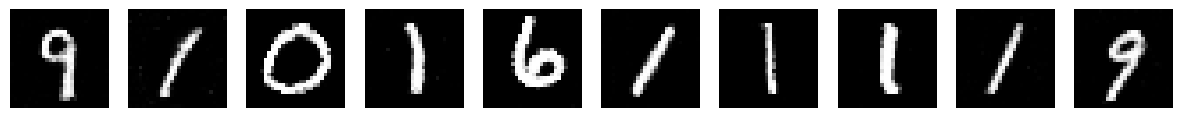

Epoch: 197/200 | Generator Loss: 1.4300295930427274 | Discriminator Loss: 0.4807239582162422


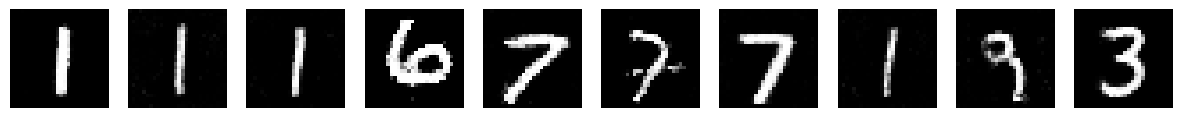

Epoch: 198/200 | Generator Loss: 1.415239243873401 | Discriminator Loss: 0.4830341257774499


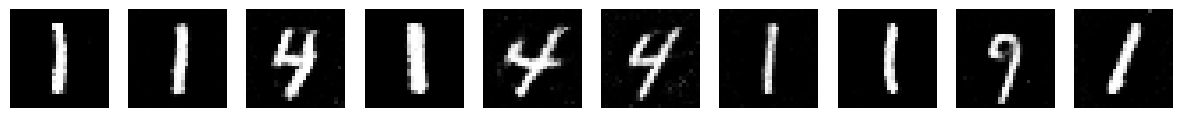

Epoch: 199/200 | Generator Loss: 1.4168364633120962 | Discriminator Loss: 0.4811780952187235


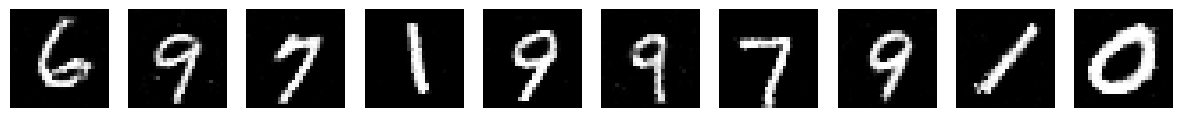

In [173]:

gen_losses, disc_losses = [], []



for epoch in tqdm(range(epochs)):

    generator_epoch_losses = []
    discriminator_epoch_losses = []

    
    for images, _ in trainloader:

        batch_size = images.shape[0]

        images = images.to(device)

        ### Sample noise for Generation ###
        noise = torch.randn(batch_size, latent_dimension, device=device)

        ### Generate Images ###
        generated_imgs = generator(noise)

        ### Create Labels for Discriminator with label smoothing ###
        generated_labels = torch.zeros(batch_size, device=device)
        true_labels = torch.ones(batch_size, device=device)

        ### Concat together Labels and Images ###
        stacked_images = torch.cat((images, generated_imgs.detach()), axis=0)
        stacked_labels = torch.cat((true_labels, generated_labels), axis=0).unsqueeze(-1)

        ### Inference and Update Discriminator ###
        disc_optimizer.zero_grad()
        preds = discriminator(stacked_images)
        discriminator_loss = loss_func(preds, stacked_labels)
        discriminator_epoch_losses.append(discriminator_loss.item())
        discriminator_loss.backward()
        disc_optimizer.step()
        

        ### Create Opposite Labels for Generator Update (All generated images should be predicted as "true" images) ###
        generator_labels = torch.ones(batch_size, device=device).unsqueeze(-1)

        ### Pass generated images to discriminator (pretending they are real) and then backprop loss ###
        gen_optimizer.zero_grad()
        
        discriminator_w_generated_output = discriminator(generated_imgs)
        generator_loss = loss_func(discriminator_w_generated_output, generator_labels)
        generator_epoch_losses.append(generator_loss.item())
        generator_loss.backward()
        gen_optimizer.step()
        

    generator_epoch_losses = np.mean(generator_epoch_losses)
    discriminator_epoch_losses = np.mean(discriminator_epoch_losses)

    print(f"Epoch: {epoch}/{epochs} | Generator Loss: {generator_epoch_losses} | Discriminator Loss: {discriminator_epoch_losses}")

    gen_losses.append(generator_epoch_losses)
    disc_losses.append(discriminator_epoch_losses)

    generator.eval()
    with torch.no_grad():
        noise_sample = torch.randn(10, latent_dimension, device=device)
        generated_imgs = generator(noise_sample).to("cpu")

        fig, ax = plt.subplots(1,10, figsize=(15,5))

        for i in range(10):
            img = (generated_imgs[i].squeeze() + 1)/2
            ax[i].imshow(img.numpy(), cmap="gray")
            ax[i].set_axis_off()

        plt.show()
            
    generator.train()

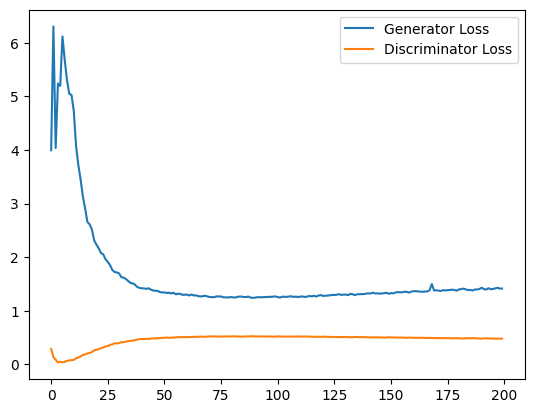

In [174]:
plt.plot(gen_losses, label="Generator Loss")
plt.plot(disc_losses, label="Discriminator Loss")
plt.legend()
plt.show()

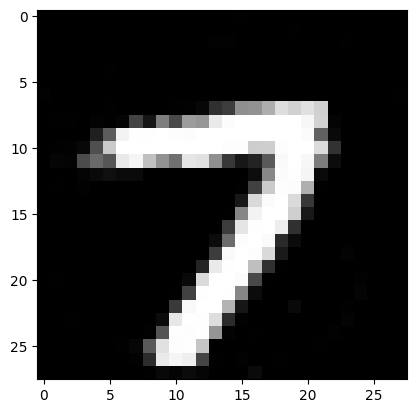

In [175]:

generator.eval()
noise_sample = torch.randn(1, latent_dimension, device=device)
generated_imgs = generator(noise_sample).detach().to("cpu")
generated_imgs = (generated_imgs.squeeze() + 1) / 2
plt.imshow(generated_imgs.numpy(), cmap="gray")
plt.show()